# Object Detection Training: Deep Solaris  

In [21]:
%load_ext autoreload
%autoreload 2

import Solar

 # Training dataset.
dataset_train = Solar.SolarDataset()
dataset_train.load_solar('./polygons_nrw/', "train", 'via_region_data-15000_23000.json')
dataset_train.prepare()


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
[{'filename': '18000.png', 'size': 373294, 'regions': [{'shape_attributes': {'name': 'polygon', 'all_points_x': [167, 214, 152, 106, 131, 167, 181, 143], 'all_points_y': [232, 297, 362, 298, 271, 320, 305, 256]}, 'region_attributes': {}}], 'file_attributes': {}}, {'filename': '18001.png', 'size': 380777, 'regions': [{'shape_attributes': {'name': 'polygon', 'all_points_x': [202, 195, 178, 178, 195, 187, 144, 148, 129, 130, 151, 158], 'all_points_y': [135, 178, 175, 208, 211, 321, 316, 269, 266, 233, 232, 124]}, 'region_attributes': {}}], 'file_attributes': {}}, {'filename': '18003.png', 'size': 365145, 'regions': [{'shape_attributes': {'name': 'polygon', 'all_points_x': [134, 118, 82, 97], 'all_points_y': [165, 249, 245, 157]}, 'region_attributes': {}}, {'shape_attributes': {'name': 'polygon', 'all_points_x': [149, 139, 117, 122, 128, 133, 145, 142], 'all_points_y': [253, 286, 282, 251, 251, 229, 229

In [22]:
dataset_train.image_info[0]

{'id': '18000.png',
 'source': 'solar',
 'path': './polygons_nrw/train/18000.png',
 'width': 500,
 'height': 500,
 'polygons': [{'name': 'polygon',
   'all_points_x': [167, 214, 152, 106, 131, 167, 181, 143],
   'all_points_y': [232, 297, 362, 298, 271, 320, 305, 256]}]}

In [23]:
 # Training dataset.
dataset_val = Solar.SolarDataset()
dataset_val.load_solar('./polygons_nrw/', "val",'via_region_data.json')
dataset_val.prepare()

[{'filename': '10.png', 'size': 340838, 'regions': [{'shape_attributes': {'name': 'polygon', 'all_points_x': [4, 39, 62, 1], 'all_points_y': [354, 345, 431, 444]}, 'region_attributes': {}}, {'shape_attributes': {'name': 'polygon', 'all_points_x': [213, 232, 330, 327, 307, 280, 267, 261, 283, 284], 'all_points_y': [293, 380, 356, 338, 343, 353, 311, 290, 282, 276]}, 'region_attributes': {}}], 'file_attributes': {}}, {'filename': '15.png', 'size': 353800, 'regions': [{'shape_attributes': {'name': 'polygon', 'all_points_x': [150, 160, 186, 174], 'all_points_y': [225, 292, 288, 222]}, 'region_attributes': {}}, {'shape_attributes': {'name': 'polygon', 'all_points_x': [202, 204, 287, 283, 256, 253], 'all_points_y': [244, 283, 274, 254, 256, 236]}, 'region_attributes': {}}, {'shape_attributes': {'name': 'polygon', 'all_points_x': [295, 296, 308, 310, 347, 348], 'all_points_y': [275, 268, 267, 259, 257, 270]}, 'region_attributes': {}}, {'shape_attributes': {'name': 'polygon', 'all_points_x': [

In [ ]:
import mrcnn.model as modellib

config = Solar.SolarConfig()
model = modellib.MaskRCNN(mode="training", config=config,
                                  model_dir='./')

weights_path = model.get_imagenet_weights()

In [26]:
weights_path

'/home/stefano/.keras/models/resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5'

In [25]:
model.load_weights(weights_path,by_name=True)

In [27]:
print("Training network ")
model.train(dataset_train, dataset_val,
                learning_rate=config.LEARNING_RATE,
                epochs=30,
                layers='heads')

Training network 

Starting at epoch 0. LR=0.001

Checkpoint Path: ./solar_panel20200112T0816/mask_rcnn_solar_panel_{epoch:04d}.h5
Selecting layers to train
fpn_c5p5               (Conv2D)
fpn_c4p4               (Conv2D)
fpn_c3p3               (Conv2D)
fpn_c2p2               (Conv2D)
fpn_p5                 (Conv2D)
fpn_p2                 (Conv2D)
fpn_p3                 (Conv2D)
fpn_p4                 (Conv2D)
In model:  rpn_model
    rpn_conv_shared        (Conv2D)
    rpn_class_raw          (Conv2D)
    rpn_bbox_pred          (Conv2D)
mrcnn_mask_conv1       (TimeDistributed)
mrcnn_mask_bn1         (TimeDistributed)
mrcnn_mask_conv2       (TimeDistributed)
mrcnn_mask_bn2         (TimeDistributed)
mrcnn_class_conv1      (TimeDistributed)
mrcnn_class_bn1        (TimeDistributed)
mrcnn_mask_conv3       (TimeDistributed)
mrcnn_mask_bn3         (TimeDistributed)
mrcnn_class_conv2      (TimeDistributed)
mrcnn_class_bn2        (TimeDistributed)
mrcnn_mask_conv4       (TimeDistributed)
mrcnn_m

/home/stefano/anaconda3/lib/python3.7/site-packages/tensorflow/python/ops/gradients_util.py:93: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
/home/stefano/anaconda3/lib/python3.7/site-packages/tensorflow/python/ops/gradients_util.py:93: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
/home/stefano/anaconda3/lib/python3.7/site-packages/tensorflow/python/ops/gradients_util.py:93: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
/home/stefano/anaconda3/lib/python3.7/site-packages/keras/engine/training_generator.py:49: UserWarning: Using a generator

Epoch 1/30
100/100 [==============================] - 132s 1s/step - loss: 2.9890 - rpn_class_loss: 0.3959 - rpn_bbox_loss: 1.2402 - mrcnn_class_loss: 0.0489 - mrcnn_bbox_loss: 0.6804 - mrcnn_mask_loss: 0.6235 - val_loss: 3.6627 - val_rpn_class_loss: 0.0932 - val_rpn_bbox_loss: 1.4836 - val_mrcnn_class_loss: 0.0468 - val_mrcnn_bbox_loss: 1.3530 - val_mrcnn_mask_loss: 0.6861
Epoch 2/30
100/100 [==============================] - 96s 959ms/step - loss: 2.4595 - rpn_class_loss: 0.0833 - rpn_bbox_loss: 0.9514 - mrcnn_class_loss: 0.0421 - mrcnn_bbox_loss: 0.6979 - mrcnn_mask_loss: 0.6848 - val_loss: 3.3275 - val_rpn_class_loss: 0.1596 - val_rpn_bbox_loss: 1.6876 - val_mrcnn_class_loss: 0.0739 - val_mrcnn_bbox_loss: 0.7300 - val_mrcnn_mask_loss: 0.6763
Epoch 3/30
100/100 [==============================] - 97s 971ms/step - loss: 1.9693 - rpn_class_loss: 0.0655 - rpn_bbox_loss: 0.6839 - mrcnn_class_loss: 0.0650 - mrcnn_bbox_loss: 0.4920 - mrcnn_mask_loss: 0.6628 - val_loss: 2.5074 - val_rpn_cla

Epoch 23/30
100/100 [==============================] - 96s 961ms/step - loss: 1.2489 - rpn_class_loss: 0.0208 - rpn_bbox_loss: 0.4746 - mrcnn_class_loss: 0.0903 - mrcnn_bbox_loss: 0.3011 - mrcnn_mask_loss: 0.3620 - val_loss: 1.8618 - val_rpn_class_loss: 0.0695 - val_rpn_bbox_loss: 0.6653 - val_mrcnn_class_loss: 0.2056 - val_mrcnn_bbox_loss: 0.5336 - val_mrcnn_mask_loss: 0.3877
Epoch 24/30
100/100 [==============================] - 96s 955ms/step - loss: 1.1912 - rpn_class_loss: 0.0259 - rpn_bbox_loss: 0.4180 - mrcnn_class_loss: 0.1036 - mrcnn_bbox_loss: 0.3160 - mrcnn_mask_loss: 0.3277 - val_loss: 1.6684 - val_rpn_class_loss: 0.0485 - val_rpn_bbox_loss: 0.8675 - val_mrcnn_class_loss: 0.0983 - val_mrcnn_bbox_loss: 0.3695 - val_mrcnn_mask_loss: 0.2846
Epoch 25/30
100/100 [==============================] - 95s 950ms/step - loss: 1.1661 - rpn_class_loss: 0.0169 - rpn_bbox_loss: 0.4236 - mrcnn_class_loss: 0.0771 - mrcnn_bbox_loss: 0.2982 - mrcnn_mask_loss: 0.3503 - val_loss: 1.4787 - val_rp

# Object Detection Inference: DeepSolaris

In [26]:
import mrcnn.model as modellib
import Solar

config = Solar.SolarConfig()

model = modellib.MaskRCNN(mode="inference", config=config,
                                  model_dir='./')

model.load_weights('./solar_panel20200112T0816/mask_rcnn_solar_panel_0021.h5',by_name=True)

Re-starting from epoch 21


In [27]:

config.display()


Configurations:
BACKBONE                       resnet101
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     2
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.9
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 2
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  1024
IMAGE_META_SIZE                14
IMAGE_MIN_DIM                  800
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [1024 1024    3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0}
MASK_POOL_SIZE                 14
MASK_SHAPE         

# Little Demo Solar Panel Detection

Processing 2 images
image                    shape: (500, 500, 3)         min:   13.00000  max:  254.00000  uint8
image                    shape: (500, 500, 3)         min:   13.00000  max:  254.00000  uint8
molded_images            shape: (2, 1024, 1024, 3)    min: -123.70000  max:  150.10000  float64
image_metas              shape: (2, 14)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (2, 261888, 4)        min:   -0.35390  max:    1.29134  float32


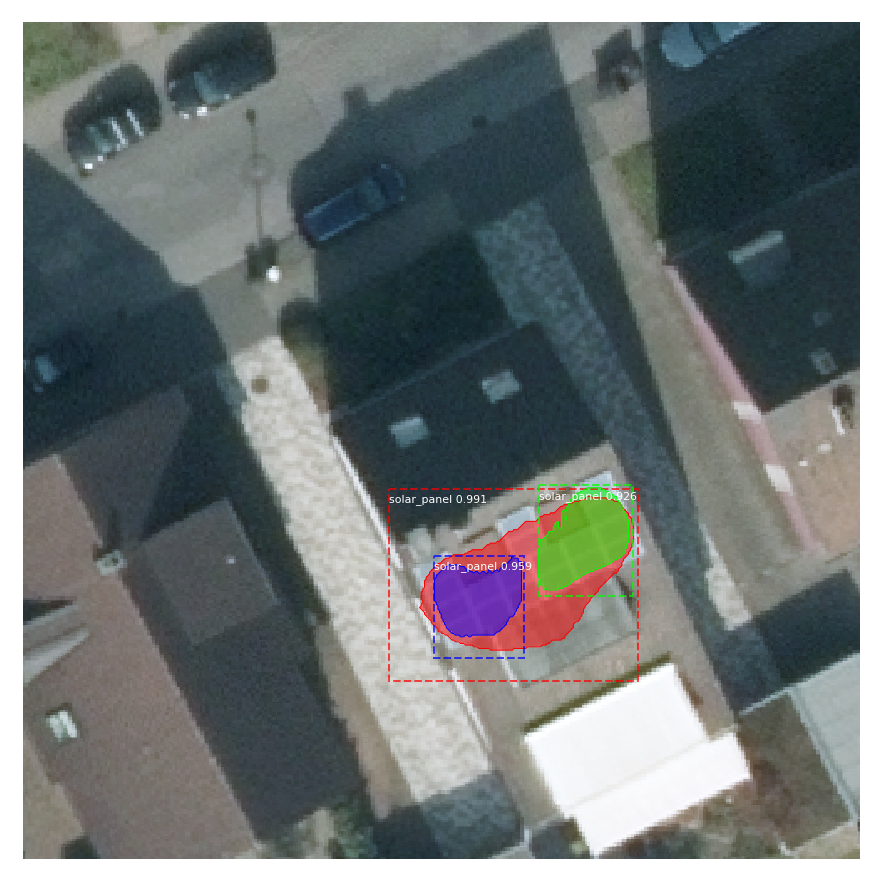

In [52]:
import skimage
import os
import random
from mrcnn import visualize

#IMAGE_DIR = './polygons_nrw/val/'
IMAGE_DIR = './demo_img/'


file_names = next(os.walk(IMAGE_DIR))[2]

image = skimage.io.imread(os.path.join(IMAGE_DIR, random.choice(file_names)))

#image = skimage.transform.resize(image,(1024,1024))


#Run detection
results = model.detect([image,image], verbose=1)

# Visualize results
r = results[0]
visualize.display_instances(image, r['rois'], r['masks'], r['class_ids'], 
                            ['neutral','solar_panel'], r['scores'])



In [53]:
r['scores']

array([0.99099594, 0.959033  , 0.92550766], dtype=float32)

# Test On Balanced Data 

In [50]:
import numpy as np

#IMAGE_DIR = './polygons_nrw/val/'
IMAGE_DIR_POS = './balanced_test_data/pos_test/'
IMAGE_DIR_NEG = './balanced_test_data/neg_test/'

file_names_pos = next(os.walk(IMAGE_DIR_POS))[2]
file_names_neg = next(os.walk(IMAGE_DIR_NEG))[2]

file_names_all = []

[file_names_all.append(IMAGE_DIR_POS+x) for x in file_names_pos]

[file_names_all.append(IMAGE_DIR_NEG+x) for x in file_names_neg]

print(len(file_names_all))

target_pos = np.zeros((len(file_names_pos))) +1
target_neg = np.zeros((len(file_names_neg)))

target = np.append(target_pos, target_neg)
print(len(target))
print(len(file_names_pos))
print(len(file_names_neg))

print(len(prediction))



2102
2102
1062
1040
2102


In [56]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


prediction = np.zeros(len(target))

for i in range(0,len(file_names_all)):
    image = skimage.io.imread(file_names_all[i])
    #Run detection
    results = model.detect([image,image], verbose=0)
    r = results[0]
    scores = r['scores']
    if (scores>0.9).any():
        prediction[i]=1
    
    

Processing 2 images
image                    shape: (500, 500, 3)         min:    0.00000  max:  250.00000  uint8
image                    shape: (500, 500, 3)         min:    0.00000  max:  250.00000  uint8
molded_images            shape: (2, 1024, 1024, 3)    min: -123.70000  max:  145.10000  float64
image_metas              shape: (2, 14)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (2, 261888, 4)        min:   -0.35390  max:    1.29134  float32
Processing 2 images
image                    shape: (500, 500, 3)         min:    0.00000  max:  247.00000  uint8
image                    shape: (500, 500, 3)         min:    0.00000  max:  247.00000  uint8
molded_images            shape: (2, 1024, 1024, 3)    min: -123.70000  max:  142.10000  float64
image_metas              shape: (2, 14)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (2, 261888, 4)        min:   -0.35390  max:    1.29134  float32
Processi

Processing 2 images
image                    shape: (500, 500, 3)         min:    0.00000  max:  246.00000  uint8
image                    shape: (500, 500, 3)         min:    0.00000  max:  246.00000  uint8
molded_images            shape: (2, 1024, 1024, 3)    min: -123.70000  max:  141.10000  float64
image_metas              shape: (2, 14)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (2, 261888, 4)        min:   -0.35390  max:    1.29134  float32
Processing 2 images
image                    shape: (500, 500, 3)         min:    0.00000  max:  254.00000  uint8
image                    shape: (500, 500, 3)         min:    0.00000  max:  254.00000  uint8
molded_images            shape: (2, 1024, 1024, 3)    min: -123.70000  max:  150.10000  float64
image_metas              shape: (2, 14)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (2, 261888, 4)        min:   -0.35390  max:    1.29134  float32
Processi

Processing 2 images
image                    shape: (500, 500, 3)         min:    0.00000  max:  239.00000  uint8
image                    shape: (500, 500, 3)         min:    0.00000  max:  239.00000  uint8
molded_images            shape: (2, 1024, 1024, 3)    min: -123.70000  max:  134.10000  float64
image_metas              shape: (2, 14)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (2, 261888, 4)        min:   -0.35390  max:    1.29134  float32
Processing 2 images
image                    shape: (500, 500, 3)         min:    0.00000  max:  240.00000  uint8
image                    shape: (500, 500, 3)         min:    0.00000  max:  240.00000  uint8
molded_images            shape: (2, 1024, 1024, 3)    min: -123.70000  max:  135.10000  float64
image_metas              shape: (2, 14)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (2, 261888, 4)        min:   -0.35390  max:    1.29134  float32
Processi

Processing 2 images
image                    shape: (500, 500, 3)         min:    0.00000  max:  254.00000  uint8
image                    shape: (500, 500, 3)         min:    0.00000  max:  254.00000  uint8
molded_images            shape: (2, 1024, 1024, 3)    min: -123.70000  max:  150.10000  float64
image_metas              shape: (2, 14)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (2, 261888, 4)        min:   -0.35390  max:    1.29134  float32
Processing 2 images
image                    shape: (500, 500, 3)         min:    0.00000  max:  245.00000  uint8
image                    shape: (500, 500, 3)         min:    0.00000  max:  245.00000  uint8
molded_images            shape: (2, 1024, 1024, 3)    min: -123.70000  max:  137.10000  float64
image_metas              shape: (2, 14)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (2, 261888, 4)        min:   -0.35390  max:    1.29134  float32
Processi

Processing 2 images
image                    shape: (500, 500, 3)         min:    0.00000  max:  245.00000  uint8
image                    shape: (500, 500, 3)         min:    0.00000  max:  245.00000  uint8
molded_images            shape: (2, 1024, 1024, 3)    min: -123.70000  max:  138.10000  float64
image_metas              shape: (2, 14)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (2, 261888, 4)        min:   -0.35390  max:    1.29134  float32
Processing 2 images
image                    shape: (500, 500, 3)         min:    0.00000  max:  251.00000  uint8
image                    shape: (500, 500, 3)         min:    0.00000  max:  251.00000  uint8
molded_images            shape: (2, 1024, 1024, 3)    min: -123.70000  max:  146.10000  float64
image_metas              shape: (2, 14)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (2, 261888, 4)        min:   -0.35390  max:    1.29134  float32
Processi

Processing 2 images
image                    shape: (500, 500, 3)         min:    0.00000  max:  254.00000  uint8
image                    shape: (500, 500, 3)         min:    0.00000  max:  254.00000  uint8
molded_images            shape: (2, 1024, 1024, 3)    min: -123.70000  max:  150.10000  float64
image_metas              shape: (2, 14)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (2, 261888, 4)        min:   -0.35390  max:    1.29134  float32
Processing 2 images
image                    shape: (500, 500, 3)         min:    0.00000  max:  230.00000  uint8
image                    shape: (500, 500, 3)         min:    0.00000  max:  230.00000  uint8
molded_images            shape: (2, 1024, 1024, 3)    min: -123.70000  max:  125.10000  float64
image_metas              shape: (2, 14)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (2, 261888, 4)        min:   -0.35390  max:    1.29134  float32
Processi

Processing 2 images
image                    shape: (500, 500, 3)         min:    0.00000  max:  254.00000  uint8
image                    shape: (500, 500, 3)         min:    0.00000  max:  254.00000  uint8
molded_images            shape: (2, 1024, 1024, 3)    min: -123.70000  max:  150.10000  float64
image_metas              shape: (2, 14)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (2, 261888, 4)        min:   -0.35390  max:    1.29134  float32
Processing 2 images
image                    shape: (500, 500, 3)         min:    0.00000  max:  246.00000  uint8
image                    shape: (500, 500, 3)         min:    0.00000  max:  246.00000  uint8
molded_images            shape: (2, 1024, 1024, 3)    min: -123.70000  max:  142.10000  float64
image_metas              shape: (2, 14)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (2, 261888, 4)        min:   -0.35390  max:    1.29134  float32
Processi

Processing 2 images
image                    shape: (500, 500, 3)         min:    0.00000  max:  254.00000  uint8
image                    shape: (500, 500, 3)         min:    0.00000  max:  254.00000  uint8
molded_images            shape: (2, 1024, 1024, 3)    min: -123.70000  max:  150.10000  float64
image_metas              shape: (2, 14)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (2, 261888, 4)        min:   -0.35390  max:    1.29134  float32
Processing 2 images
image                    shape: (500, 500, 3)         min:    0.00000  max:  249.00000  uint8
image                    shape: (500, 500, 3)         min:    0.00000  max:  249.00000  uint8
molded_images            shape: (2, 1024, 1024, 3)    min: -123.70000  max:  144.10000  float64
image_metas              shape: (2, 14)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (2, 261888, 4)        min:   -0.35390  max:    1.29134  float32
Processi

Processing 2 images
image                    shape: (500, 500, 3)         min:    0.00000  max:  237.00000  uint8
image                    shape: (500, 500, 3)         min:    0.00000  max:  237.00000  uint8
molded_images            shape: (2, 1024, 1024, 3)    min: -123.70000  max:  131.10000  float64
image_metas              shape: (2, 14)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (2, 261888, 4)        min:   -0.35390  max:    1.29134  float32
Processing 2 images
image                    shape: (500, 500, 3)         min:    0.00000  max:  254.00000  uint8
image                    shape: (500, 500, 3)         min:    0.00000  max:  254.00000  uint8
molded_images            shape: (2, 1024, 1024, 3)    min: -123.70000  max:  150.10000  float64
image_metas              shape: (2, 14)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (2, 261888, 4)        min:   -0.35390  max:    1.29134  float32
Processi

Processing 2 images
image                    shape: (500, 500, 3)         min:    0.00000  max:  254.00000  uint8
image                    shape: (500, 500, 3)         min:    0.00000  max:  254.00000  uint8
molded_images            shape: (2, 1024, 1024, 3)    min: -123.70000  max:  150.10000  float64
image_metas              shape: (2, 14)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (2, 261888, 4)        min:   -0.35390  max:    1.29134  float32
Processing 2 images
image                    shape: (500, 500, 3)         min:    0.00000  max:  254.00000  uint8
image                    shape: (500, 500, 3)         min:    0.00000  max:  254.00000  uint8
molded_images            shape: (2, 1024, 1024, 3)    min: -123.70000  max:  150.10000  float64
image_metas              shape: (2, 14)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (2, 261888, 4)        min:   -0.35390  max:    1.29134  float32
Processi

Processing 2 images
image                    shape: (500, 500, 3)         min:    0.00000  max:  248.00000  uint8
image                    shape: (500, 500, 3)         min:    0.00000  max:  248.00000  uint8
molded_images            shape: (2, 1024, 1024, 3)    min: -123.70000  max:  144.10000  float64
image_metas              shape: (2, 14)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (2, 261888, 4)        min:   -0.35390  max:    1.29134  float32
Processing 2 images
image                    shape: (500, 500, 3)         min:    0.00000  max:  249.00000  uint8
image                    shape: (500, 500, 3)         min:    0.00000  max:  249.00000  uint8
molded_images            shape: (2, 1024, 1024, 3)    min: -123.70000  max:  143.10000  float64
image_metas              shape: (2, 14)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (2, 261888, 4)        min:   -0.35390  max:    1.29134  float32
Processi

Processing 2 images
image                    shape: (500, 500, 3)         min:    0.00000  max:  248.00000  uint8
image                    shape: (500, 500, 3)         min:    0.00000  max:  248.00000  uint8
molded_images            shape: (2, 1024, 1024, 3)    min: -123.70000  max:  126.10000  float64
image_metas              shape: (2, 14)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (2, 261888, 4)        min:   -0.35390  max:    1.29134  float32
Processing 2 images
image                    shape: (500, 500, 3)         min:    0.00000  max:  247.00000  uint8
image                    shape: (500, 500, 3)         min:    0.00000  max:  247.00000  uint8
molded_images            shape: (2, 1024, 1024, 3)    min: -123.70000  max:  140.10000  float64
image_metas              shape: (2, 14)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (2, 261888, 4)        min:   -0.35390  max:    1.29134  float32
Processi

Processing 2 images
image                    shape: (500, 500, 3)         min:    0.00000  max:  249.00000  uint8
image                    shape: (500, 500, 3)         min:    0.00000  max:  249.00000  uint8
molded_images            shape: (2, 1024, 1024, 3)    min: -123.70000  max:  145.10000  float64
image_metas              shape: (2, 14)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (2, 261888, 4)        min:   -0.35390  max:    1.29134  float32
Processing 2 images
image                    shape: (500, 500, 3)         min:    0.00000  max:  252.00000  uint8
image                    shape: (500, 500, 3)         min:    0.00000  max:  252.00000  uint8
molded_images            shape: (2, 1024, 1024, 3)    min: -123.70000  max:  148.10000  float64
image_metas              shape: (2, 14)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (2, 261888, 4)        min:   -0.35390  max:    1.29134  float32
Processi

Processing 2 images
image                    shape: (500, 500, 3)         min:    0.00000  max:  244.00000  uint8
image                    shape: (500, 500, 3)         min:    0.00000  max:  244.00000  uint8
molded_images            shape: (2, 1024, 1024, 3)    min: -123.70000  max:  121.10000  float64
image_metas              shape: (2, 14)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (2, 261888, 4)        min:   -0.35390  max:    1.29134  float32
Processing 2 images
image                    shape: (500, 500, 3)         min:    0.00000  max:  254.00000  uint8
image                    shape: (500, 500, 3)         min:    0.00000  max:  254.00000  uint8
molded_images            shape: (2, 1024, 1024, 3)    min: -123.70000  max:  149.10000  float64
image_metas              shape: (2, 14)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (2, 261888, 4)        min:   -0.35390  max:    1.29134  float32
Processi

Processing 2 images
image                    shape: (500, 500, 3)         min:    0.00000  max:  254.00000  uint8
image                    shape: (500, 500, 3)         min:    0.00000  max:  254.00000  uint8
molded_images            shape: (2, 1024, 1024, 3)    min: -123.70000  max:  150.10000  float64
image_metas              shape: (2, 14)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (2, 261888, 4)        min:   -0.35390  max:    1.29134  float32
Processing 2 images
image                    shape: (500, 500, 3)         min:    0.00000  max:  242.00000  uint8
image                    shape: (500, 500, 3)         min:    0.00000  max:  242.00000  uint8
molded_images            shape: (2, 1024, 1024, 3)    min: -123.70000  max:  135.10000  float64
image_metas              shape: (2, 14)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (2, 261888, 4)        min:   -0.35390  max:    1.29134  float32
Processi

Processing 2 images
image                    shape: (500, 500, 3)         min:    0.00000  max:  254.00000  uint8
image                    shape: (500, 500, 3)         min:    0.00000  max:  254.00000  uint8
molded_images            shape: (2, 1024, 1024, 3)    min: -123.70000  max:  150.10000  float64
image_metas              shape: (2, 14)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (2, 261888, 4)        min:   -0.35390  max:    1.29134  float32
Processing 2 images
image                    shape: (500, 500, 3)         min:    0.00000  max:  254.00000  uint8
image                    shape: (500, 500, 3)         min:    0.00000  max:  254.00000  uint8
molded_images            shape: (2, 1024, 1024, 3)    min: -123.70000  max:  150.10000  float64
image_metas              shape: (2, 14)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (2, 261888, 4)        min:   -0.35390  max:    1.29134  float32
Processi

Processing 2 images
image                    shape: (500, 500, 3)         min:    0.00000  max:  254.00000  uint8
image                    shape: (500, 500, 3)         min:    0.00000  max:  254.00000  uint8
molded_images            shape: (2, 1024, 1024, 3)    min: -123.70000  max:  150.10000  float64
image_metas              shape: (2, 14)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (2, 261888, 4)        min:   -0.35390  max:    1.29134  float32
Processing 2 images
image                    shape: (500, 500, 3)         min:    0.00000  max:  241.00000  uint8
image                    shape: (500, 500, 3)         min:    0.00000  max:  241.00000  uint8
molded_images            shape: (2, 1024, 1024, 3)    min: -123.70000  max:  137.10000  float64
image_metas              shape: (2, 14)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (2, 261888, 4)        min:   -0.35390  max:    1.29134  float32
Processi

Processing 2 images
image                    shape: (500, 500, 3)         min:    0.00000  max:  254.00000  uint8
image                    shape: (500, 500, 3)         min:    0.00000  max:  254.00000  uint8
molded_images            shape: (2, 1024, 1024, 3)    min: -123.70000  max:  150.10000  float64
image_metas              shape: (2, 14)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (2, 261888, 4)        min:   -0.35390  max:    1.29134  float32
Processing 2 images
image                    shape: (500, 500, 3)         min:    0.00000  max:  254.00000  uint8
image                    shape: (500, 500, 3)         min:    0.00000  max:  254.00000  uint8
molded_images            shape: (2, 1024, 1024, 3)    min: -123.70000  max:  150.10000  float64
image_metas              shape: (2, 14)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (2, 261888, 4)        min:   -0.35390  max:    1.29134  float32
Processi

Processing 2 images
image                    shape: (500, 500, 3)         min:    0.00000  max:  248.00000  uint8
image                    shape: (500, 500, 3)         min:    0.00000  max:  248.00000  uint8
molded_images            shape: (2, 1024, 1024, 3)    min: -123.70000  max:  138.10000  float64
image_metas              shape: (2, 14)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (2, 261888, 4)        min:   -0.35390  max:    1.29134  float32
Processing 2 images
image                    shape: (500, 500, 3)         min:    0.00000  max:  254.00000  uint8
image                    shape: (500, 500, 3)         min:    0.00000  max:  254.00000  uint8
molded_images            shape: (2, 1024, 1024, 3)    min: -123.70000  max:  145.10000  float64
image_metas              shape: (2, 14)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (2, 261888, 4)        min:   -0.35390  max:    1.29134  float32
Processi

Processing 2 images
image                    shape: (500, 500, 3)         min:    0.00000  max:  244.00000  uint8
image                    shape: (500, 500, 3)         min:    0.00000  max:  244.00000  uint8
molded_images            shape: (2, 1024, 1024, 3)    min: -123.70000  max:  139.10000  float64
image_metas              shape: (2, 14)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (2, 261888, 4)        min:   -0.35390  max:    1.29134  float32
Processing 2 images
image                    shape: (500, 500, 3)         min:    0.00000  max:  254.00000  uint8
image                    shape: (500, 500, 3)         min:    0.00000  max:  254.00000  uint8
molded_images            shape: (2, 1024, 1024, 3)    min: -123.70000  max:  149.10000  float64
image_metas              shape: (2, 14)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (2, 261888, 4)        min:   -0.35390  max:    1.29134  float32
Processi

Processing 2 images
image                    shape: (500, 500, 3)         min:    0.00000  max:  249.00000  uint8
image                    shape: (500, 500, 3)         min:    0.00000  max:  249.00000  uint8
molded_images            shape: (2, 1024, 1024, 3)    min: -123.70000  max:  141.10000  float64
image_metas              shape: (2, 14)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (2, 261888, 4)        min:   -0.35390  max:    1.29134  float32
Processing 2 images
image                    shape: (500, 500, 3)         min:    0.00000  max:  251.00000  uint8
image                    shape: (500, 500, 3)         min:    0.00000  max:  251.00000  uint8
molded_images            shape: (2, 1024, 1024, 3)    min: -123.70000  max:  140.10000  float64
image_metas              shape: (2, 14)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (2, 261888, 4)        min:   -0.35390  max:    1.29134  float32
Processi

Processing 2 images
image                    shape: (500, 500, 3)         min:    0.00000  max:  229.00000  uint8
image                    shape: (500, 500, 3)         min:    0.00000  max:  229.00000  uint8
molded_images            shape: (2, 1024, 1024, 3)    min: -123.70000  max:  125.10000  float64
image_metas              shape: (2, 14)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (2, 261888, 4)        min:   -0.35390  max:    1.29134  float32
Processing 2 images
image                    shape: (500, 500, 3)         min:    0.00000  max:  253.00000  uint8
image                    shape: (500, 500, 3)         min:    0.00000  max:  253.00000  uint8
molded_images            shape: (2, 1024, 1024, 3)    min: -123.70000  max:  147.10000  float64
image_metas              shape: (2, 14)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (2, 261888, 4)        min:   -0.35390  max:    1.29134  float32
Processi

Processing 2 images
image                    shape: (500, 500, 3)         min:    0.00000  max:  246.00000  uint8
image                    shape: (500, 500, 3)         min:    0.00000  max:  246.00000  uint8
molded_images            shape: (2, 1024, 1024, 3)    min: -123.70000  max:  134.10000  float64
image_metas              shape: (2, 14)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (2, 261888, 4)        min:   -0.35390  max:    1.29134  float32
Processing 2 images
image                    shape: (500, 500, 3)         min:    0.00000  max:  254.00000  uint8
image                    shape: (500, 500, 3)         min:    0.00000  max:  254.00000  uint8
molded_images            shape: (2, 1024, 1024, 3)    min: -123.70000  max:  142.10000  float64
image_metas              shape: (2, 14)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (2, 261888, 4)        min:   -0.35390  max:    1.29134  float32
Processi

Processing 2 images
image                    shape: (500, 500, 3)         min:    0.00000  max:  254.00000  uint8
image                    shape: (500, 500, 3)         min:    0.00000  max:  254.00000  uint8
molded_images            shape: (2, 1024, 1024, 3)    min: -123.70000  max:  150.10000  float64
image_metas              shape: (2, 14)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (2, 261888, 4)        min:   -0.35390  max:    1.29134  float32
Processing 2 images
image                    shape: (500, 500, 3)         min:    0.00000  max:  249.00000  uint8
image                    shape: (500, 500, 3)         min:    0.00000  max:  249.00000  uint8
molded_images            shape: (2, 1024, 1024, 3)    min: -123.70000  max:  145.10000  float64
image_metas              shape: (2, 14)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (2, 261888, 4)        min:   -0.35390  max:    1.29134  float32
Processi

Processing 2 images
image                    shape: (500, 500, 3)         min:    0.00000  max:  254.00000  uint8
image                    shape: (500, 500, 3)         min:    0.00000  max:  254.00000  uint8
molded_images            shape: (2, 1024, 1024, 3)    min: -123.70000  max:  150.10000  float64
image_metas              shape: (2, 14)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (2, 261888, 4)        min:   -0.35390  max:    1.29134  float32
Processing 2 images
image                    shape: (500, 500, 3)         min:    0.00000  max:  254.00000  uint8
image                    shape: (500, 500, 3)         min:    0.00000  max:  254.00000  uint8
molded_images            shape: (2, 1024, 1024, 3)    min: -123.70000  max:  150.10000  float64
image_metas              shape: (2, 14)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (2, 261888, 4)        min:   -0.35390  max:    1.29134  float32
Processi

Processing 2 images
image                    shape: (500, 500, 3)         min:    0.00000  max:  249.00000  uint8
image                    shape: (500, 500, 3)         min:    0.00000  max:  249.00000  uint8
molded_images            shape: (2, 1024, 1024, 3)    min: -123.70000  max:  145.10000  float64
image_metas              shape: (2, 14)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (2, 261888, 4)        min:   -0.35390  max:    1.29134  float32
Processing 2 images
image                    shape: (500, 500, 3)         min:    0.00000  max:  254.00000  uint8
image                    shape: (500, 500, 3)         min:    0.00000  max:  254.00000  uint8
molded_images            shape: (2, 1024, 1024, 3)    min: -123.70000  max:  150.10000  float64
image_metas              shape: (2, 14)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (2, 261888, 4)        min:   -0.35390  max:    1.29134  float32
Processi

Processing 2 images
image                    shape: (500, 500, 3)         min:    0.00000  max:  254.00000  uint8
image                    shape: (500, 500, 3)         min:    0.00000  max:  254.00000  uint8
molded_images            shape: (2, 1024, 1024, 3)    min: -123.70000  max:  150.10000  float64
image_metas              shape: (2, 14)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (2, 261888, 4)        min:   -0.35390  max:    1.29134  float32
Processing 2 images
image                    shape: (500, 500, 3)         min:    0.00000  max:  247.00000  uint8
image                    shape: (500, 500, 3)         min:    0.00000  max:  247.00000  uint8
molded_images            shape: (2, 1024, 1024, 3)    min: -123.70000  max:  125.10000  float64
image_metas              shape: (2, 14)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (2, 261888, 4)        min:   -0.35390  max:    1.29134  float32
Processi

Processing 2 images
image                    shape: (500, 500, 3)         min:    0.00000  max:  254.00000  uint8
image                    shape: (500, 500, 3)         min:    0.00000  max:  254.00000  uint8
molded_images            shape: (2, 1024, 1024, 3)    min: -123.70000  max:  150.10000  float64
image_metas              shape: (2, 14)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (2, 261888, 4)        min:   -0.35390  max:    1.29134  float32
Processing 2 images
image                    shape: (500, 500, 3)         min:    0.00000  max:  253.00000  uint8
image                    shape: (500, 500, 3)         min:    0.00000  max:  253.00000  uint8
molded_images            shape: (2, 1024, 1024, 3)    min: -123.70000  max:  147.10000  float64
image_metas              shape: (2, 14)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (2, 261888, 4)        min:   -0.35390  max:    1.29134  float32
Processi

Processing 2 images
image                    shape: (500, 500, 3)         min:    0.00000  max:  254.00000  uint8
image                    shape: (500, 500, 3)         min:    0.00000  max:  254.00000  uint8
molded_images            shape: (2, 1024, 1024, 3)    min: -123.70000  max:  149.10000  float64
image_metas              shape: (2, 14)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (2, 261888, 4)        min:   -0.35390  max:    1.29134  float32
Processing 2 images
image                    shape: (500, 500, 3)         min:    0.00000  max:  249.00000  uint8
image                    shape: (500, 500, 3)         min:    0.00000  max:  249.00000  uint8
molded_images            shape: (2, 1024, 1024, 3)    min: -123.70000  max:  144.10000  float64
image_metas              shape: (2, 14)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (2, 261888, 4)        min:   -0.35390  max:    1.29134  float32
Processi

Processing 2 images
image                    shape: (500, 500, 3)         min:    0.00000  max:  232.00000  uint8
image                    shape: (500, 500, 3)         min:    0.00000  max:  232.00000  uint8
molded_images            shape: (2, 1024, 1024, 3)    min: -123.70000  max:  126.10000  float64
image_metas              shape: (2, 14)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (2, 261888, 4)        min:   -0.35390  max:    1.29134  float32
Processing 2 images
image                    shape: (500, 500, 3)         min:    0.00000  max:  248.00000  uint8
image                    shape: (500, 500, 3)         min:    0.00000  max:  248.00000  uint8
molded_images            shape: (2, 1024, 1024, 3)    min: -123.70000  max:  137.10000  float64
image_metas              shape: (2, 14)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (2, 261888, 4)        min:   -0.35390  max:    1.29134  float32
Processi

Processing 2 images
image                    shape: (500, 500, 3)         min:    0.00000  max:  254.00000  uint8
image                    shape: (500, 500, 3)         min:    0.00000  max:  254.00000  uint8
molded_images            shape: (2, 1024, 1024, 3)    min: -123.70000  max:  150.10000  float64
image_metas              shape: (2, 14)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (2, 261888, 4)        min:   -0.35390  max:    1.29134  float32
Processing 2 images
image                    shape: (500, 500, 3)         min:    0.00000  max:  254.00000  uint8
image                    shape: (500, 500, 3)         min:    0.00000  max:  254.00000  uint8
molded_images            shape: (2, 1024, 1024, 3)    min: -123.70000  max:  150.10000  float64
image_metas              shape: (2, 14)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (2, 261888, 4)        min:   -0.35390  max:    1.29134  float32
Processi

Processing 2 images
image                    shape: (500, 500, 3)         min:    0.00000  max:  254.00000  uint8
image                    shape: (500, 500, 3)         min:    0.00000  max:  254.00000  uint8
molded_images            shape: (2, 1024, 1024, 3)    min: -123.70000  max:  150.10000  float64
image_metas              shape: (2, 14)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (2, 261888, 4)        min:   -0.35390  max:    1.29134  float32
Processing 2 images
image                    shape: (500, 500, 3)         min:    0.00000  max:  250.00000  uint8
image                    shape: (500, 500, 3)         min:    0.00000  max:  250.00000  uint8
molded_images            shape: (2, 1024, 1024, 3)    min: -123.70000  max:  135.10000  float64
image_metas              shape: (2, 14)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (2, 261888, 4)        min:   -0.35390  max:    1.29134  float32
Processi

Processing 2 images
image                    shape: (500, 500, 3)         min:    0.00000  max:  243.00000  uint8
image                    shape: (500, 500, 3)         min:    0.00000  max:  243.00000  uint8
molded_images            shape: (2, 1024, 1024, 3)    min: -123.70000  max:  138.10000  float64
image_metas              shape: (2, 14)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (2, 261888, 4)        min:   -0.35390  max:    1.29134  float32
Processing 2 images
image                    shape: (500, 500, 3)         min:    0.00000  max:  254.00000  uint8
image                    shape: (500, 500, 3)         min:    0.00000  max:  254.00000  uint8
molded_images            shape: (2, 1024, 1024, 3)    min: -123.70000  max:  150.10000  float64
image_metas              shape: (2, 14)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (2, 261888, 4)        min:   -0.35390  max:    1.29134  float32
Processi

Processing 2 images
image                    shape: (500, 500, 3)         min:    0.00000  max:  254.00000  uint8
image                    shape: (500, 500, 3)         min:    0.00000  max:  254.00000  uint8
molded_images            shape: (2, 1024, 1024, 3)    min: -123.70000  max:  148.10000  float64
image_metas              shape: (2, 14)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (2, 261888, 4)        min:   -0.35390  max:    1.29134  float32
Processing 2 images
image                    shape: (500, 500, 3)         min:    0.00000  max:  254.00000  uint8
image                    shape: (500, 500, 3)         min:    0.00000  max:  254.00000  uint8
molded_images            shape: (2, 1024, 1024, 3)    min: -123.70000  max:  150.10000  float64
image_metas              shape: (2, 14)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (2, 261888, 4)        min:   -0.35390  max:    1.29134  float32
Processi

Processing 2 images
image                    shape: (500, 500, 3)         min:    0.00000  max:  254.00000  uint8
image                    shape: (500, 500, 3)         min:    0.00000  max:  254.00000  uint8
molded_images            shape: (2, 1024, 1024, 3)    min: -123.70000  max:  150.10000  float64
image_metas              shape: (2, 14)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (2, 261888, 4)        min:   -0.35390  max:    1.29134  float32
Processing 2 images
image                    shape: (500, 500, 3)         min:    0.00000  max:  254.00000  uint8
image                    shape: (500, 500, 3)         min:    0.00000  max:  254.00000  uint8
molded_images            shape: (2, 1024, 1024, 3)    min: -123.70000  max:  150.10000  float64
image_metas              shape: (2, 14)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (2, 261888, 4)        min:   -0.35390  max:    1.29134  float32
Processi

Processing 2 images
image                    shape: (500, 500, 3)         min:    0.00000  max:  248.00000  uint8
image                    shape: (500, 500, 3)         min:    0.00000  max:  248.00000  uint8
molded_images            shape: (2, 1024, 1024, 3)    min: -123.70000  max:  142.10000  float64
image_metas              shape: (2, 14)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (2, 261888, 4)        min:   -0.35390  max:    1.29134  float32
Processing 2 images
image                    shape: (500, 500, 3)         min:    0.00000  max:  254.00000  uint8
image                    shape: (500, 500, 3)         min:    0.00000  max:  254.00000  uint8
molded_images            shape: (2, 1024, 1024, 3)    min: -123.70000  max:  148.10000  float64
image_metas              shape: (2, 14)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (2, 261888, 4)        min:   -0.35390  max:    1.29134  float32
Processi

Processing 2 images
image                    shape: (500, 500, 3)         min:    0.00000  max:  253.00000  uint8
image                    shape: (500, 500, 3)         min:    0.00000  max:  253.00000  uint8
molded_images            shape: (2, 1024, 1024, 3)    min: -123.70000  max:  145.10000  float64
image_metas              shape: (2, 14)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (2, 261888, 4)        min:   -0.35390  max:    1.29134  float32
Processing 2 images
image                    shape: (500, 500, 3)         min:    0.00000  max:  254.00000  uint8
image                    shape: (500, 500, 3)         min:    0.00000  max:  254.00000  uint8
molded_images            shape: (2, 1024, 1024, 3)    min: -123.70000  max:  149.10000  float64
image_metas              shape: (2, 14)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (2, 261888, 4)        min:   -0.35390  max:    1.29134  float32
Processi

Processing 2 images
image                    shape: (500, 500, 3)         min:    0.00000  max:  251.00000  uint8
image                    shape: (500, 500, 3)         min:    0.00000  max:  251.00000  uint8
molded_images            shape: (2, 1024, 1024, 3)    min: -123.70000  max:  146.10000  float64
image_metas              shape: (2, 14)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (2, 261888, 4)        min:   -0.35390  max:    1.29134  float32
Processing 2 images
image                    shape: (500, 500, 3)         min:    0.00000  max:  245.00000  uint8
image                    shape: (500, 500, 3)         min:    0.00000  max:  245.00000  uint8
molded_images            shape: (2, 1024, 1024, 3)    min: -123.70000  max:  137.10000  float64
image_metas              shape: (2, 14)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (2, 261888, 4)        min:   -0.35390  max:    1.29134  float32
Processi

Processing 2 images
image                    shape: (500, 500, 3)         min:    0.00000  max:  254.00000  uint8
image                    shape: (500, 500, 3)         min:    0.00000  max:  254.00000  uint8
molded_images            shape: (2, 1024, 1024, 3)    min: -123.70000  max:  150.10000  float64
image_metas              shape: (2, 14)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (2, 261888, 4)        min:   -0.35390  max:    1.29134  float32
Processing 2 images
image                    shape: (500, 500, 3)         min:    0.00000  max:  252.00000  uint8
image                    shape: (500, 500, 3)         min:    0.00000  max:  252.00000  uint8
molded_images            shape: (2, 1024, 1024, 3)    min: -123.70000  max:  148.10000  float64
image_metas              shape: (2, 14)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (2, 261888, 4)        min:   -0.35390  max:    1.29134  float32
Processi

Processing 2 images
image                    shape: (500, 500, 3)         min:    0.00000  max:  246.00000  uint8
image                    shape: (500, 500, 3)         min:    0.00000  max:  246.00000  uint8
molded_images            shape: (2, 1024, 1024, 3)    min: -123.70000  max:  140.10000  float64
image_metas              shape: (2, 14)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (2, 261888, 4)        min:   -0.35390  max:    1.29134  float32
Processing 2 images
image                    shape: (500, 500, 3)         min:    0.00000  max:  254.00000  uint8
image                    shape: (500, 500, 3)         min:    0.00000  max:  254.00000  uint8
molded_images            shape: (2, 1024, 1024, 3)    min: -123.70000  max:  150.10000  float64
image_metas              shape: (2, 14)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (2, 261888, 4)        min:   -0.35390  max:    1.29134  float32
Processi

Processing 2 images
image                    shape: (500, 500, 3)         min:    0.00000  max:  254.00000  uint8
image                    shape: (500, 500, 3)         min:    0.00000  max:  254.00000  uint8
molded_images            shape: (2, 1024, 1024, 3)    min: -123.70000  max:  149.10000  float64
image_metas              shape: (2, 14)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (2, 261888, 4)        min:   -0.35390  max:    1.29134  float32
Processing 2 images
image                    shape: (500, 500, 3)         min:    0.00000  max:  248.00000  uint8
image                    shape: (500, 500, 3)         min:    0.00000  max:  248.00000  uint8
molded_images            shape: (2, 1024, 1024, 3)    min: -123.70000  max:  144.10000  float64
image_metas              shape: (2, 14)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (2, 261888, 4)        min:   -0.35390  max:    1.29134  float32
Processi

Processing 2 images
image                    shape: (500, 500, 3)         min:    0.00000  max:  254.00000  uint8
image                    shape: (500, 500, 3)         min:    0.00000  max:  254.00000  uint8
molded_images            shape: (2, 1024, 1024, 3)    min: -123.70000  max:  150.10000  float64
image_metas              shape: (2, 14)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (2, 261888, 4)        min:   -0.35390  max:    1.29134  float32
Processing 2 images
image                    shape: (500, 500, 3)         min:    0.00000  max:  245.00000  uint8
image                    shape: (500, 500, 3)         min:    0.00000  max:  245.00000  uint8
molded_images            shape: (2, 1024, 1024, 3)    min: -123.70000  max:  141.10000  float64
image_metas              shape: (2, 14)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (2, 261888, 4)        min:   -0.35390  max:    1.29134  float32
Processi

Processing 2 images
image                    shape: (500, 500, 3)         min:    0.00000  max:  246.00000  uint8
image                    shape: (500, 500, 3)         min:    0.00000  max:  246.00000  uint8
molded_images            shape: (2, 1024, 1024, 3)    min: -123.70000  max:  134.10000  float64
image_metas              shape: (2, 14)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (2, 261888, 4)        min:   -0.35390  max:    1.29134  float32
Processing 2 images
image                    shape: (500, 500, 3)         min:    0.00000  max:  249.00000  uint8
image                    shape: (500, 500, 3)         min:    0.00000  max:  249.00000  uint8
molded_images            shape: (2, 1024, 1024, 3)    min: -123.70000  max:  141.10000  float64
image_metas              shape: (2, 14)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (2, 261888, 4)        min:   -0.35390  max:    1.29134  float32
Processi

Processing 2 images
image                    shape: (500, 500, 3)         min:    0.00000  max:  250.00000  uint8
image                    shape: (500, 500, 3)         min:    0.00000  max:  250.00000  uint8
molded_images            shape: (2, 1024, 1024, 3)    min: -123.70000  max:  146.10000  float64
image_metas              shape: (2, 14)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (2, 261888, 4)        min:   -0.35390  max:    1.29134  float32
Processing 2 images
image                    shape: (500, 500, 3)         min:    0.00000  max:  251.00000  uint8
image                    shape: (500, 500, 3)         min:    0.00000  max:  251.00000  uint8
molded_images            shape: (2, 1024, 1024, 3)    min: -123.70000  max:  147.10000  float64
image_metas              shape: (2, 14)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (2, 261888, 4)        min:   -0.35390  max:    1.29134  float32
Processi

Processing 2 images
image                    shape: (500, 500, 3)         min:    0.00000  max:  254.00000  uint8
image                    shape: (500, 500, 3)         min:    0.00000  max:  254.00000  uint8
molded_images            shape: (2, 1024, 1024, 3)    min: -123.70000  max:  150.10000  float64
image_metas              shape: (2, 14)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (2, 261888, 4)        min:   -0.35390  max:    1.29134  float32
Processing 2 images
image                    shape: (500, 500, 3)         min:    0.00000  max:  250.00000  uint8
image                    shape: (500, 500, 3)         min:    0.00000  max:  250.00000  uint8
molded_images            shape: (2, 1024, 1024, 3)    min: -123.70000  max:  143.10000  float64
image_metas              shape: (2, 14)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (2, 261888, 4)        min:   -0.35390  max:    1.29134  float32
Processi

Processing 2 images
image                    shape: (500, 500, 3)         min:    0.00000  max:  252.00000  uint8
image                    shape: (500, 500, 3)         min:    0.00000  max:  252.00000  uint8
molded_images            shape: (2, 1024, 1024, 3)    min: -123.70000  max:  147.10000  float64
image_metas              shape: (2, 14)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (2, 261888, 4)        min:   -0.35390  max:    1.29134  float32
Processing 2 images
image                    shape: (500, 500, 3)         min:    0.00000  max:  241.00000  uint8
image                    shape: (500, 500, 3)         min:    0.00000  max:  241.00000  uint8
molded_images            shape: (2, 1024, 1024, 3)    min: -123.70000  max:  136.10000  float64
image_metas              shape: (2, 14)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (2, 261888, 4)        min:   -0.35390  max:    1.29134  float32
Processi

Processing 2 images
image                    shape: (500, 500, 3)         min:    0.00000  max:  253.00000  uint8
image                    shape: (500, 500, 3)         min:    0.00000  max:  253.00000  uint8
molded_images            shape: (2, 1024, 1024, 3)    min: -123.70000  max:  144.10000  float64
image_metas              shape: (2, 14)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (2, 261888, 4)        min:   -0.35390  max:    1.29134  float32
Processing 2 images
image                    shape: (500, 500, 3)         min:    0.00000  max:  254.00000  uint8
image                    shape: (500, 500, 3)         min:    0.00000  max:  254.00000  uint8
molded_images            shape: (2, 1024, 1024, 3)    min: -123.70000  max:  150.10000  float64
image_metas              shape: (2, 14)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (2, 261888, 4)        min:   -0.35390  max:    1.29134  float32
Processi

Processing 2 images
image                    shape: (500, 500, 3)         min:    0.00000  max:  254.00000  uint8
image                    shape: (500, 500, 3)         min:    0.00000  max:  254.00000  uint8
molded_images            shape: (2, 1024, 1024, 3)    min: -123.70000  max:  150.10000  float64
image_metas              shape: (2, 14)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (2, 261888, 4)        min:   -0.35390  max:    1.29134  float32
Processing 2 images
image                    shape: (500, 500, 3)         min:    0.00000  max:  246.00000  uint8
image                    shape: (500, 500, 3)         min:    0.00000  max:  246.00000  uint8
molded_images            shape: (2, 1024, 1024, 3)    min: -123.70000  max:  138.10000  float64
image_metas              shape: (2, 14)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (2, 261888, 4)        min:   -0.35390  max:    1.29134  float32
Processi

Processing 2 images
image                    shape: (500, 500, 3)         min:    0.00000  max:  251.00000  uint8
image                    shape: (500, 500, 3)         min:    0.00000  max:  251.00000  uint8
molded_images            shape: (2, 1024, 1024, 3)    min: -123.70000  max:  146.10000  float64
image_metas              shape: (2, 14)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (2, 261888, 4)        min:   -0.35390  max:    1.29134  float32
Processing 2 images
image                    shape: (500, 500, 3)         min:    0.00000  max:  254.00000  uint8
image                    shape: (500, 500, 3)         min:    0.00000  max:  254.00000  uint8
molded_images            shape: (2, 1024, 1024, 3)    min: -123.70000  max:  150.10000  float64
image_metas              shape: (2, 14)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (2, 261888, 4)        min:   -0.35390  max:    1.29134  float32
Processi

Processing 2 images
image                    shape: (500, 500, 3)         min:    0.00000  max:  254.00000  uint8
image                    shape: (500, 500, 3)         min:    0.00000  max:  254.00000  uint8
molded_images            shape: (2, 1024, 1024, 3)    min: -123.70000  max:  150.10000  float64
image_metas              shape: (2, 14)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (2, 261888, 4)        min:   -0.35390  max:    1.29134  float32
Processing 2 images
image                    shape: (500, 500, 3)         min:    0.00000  max:  248.00000  uint8
image                    shape: (500, 500, 3)         min:    0.00000  max:  248.00000  uint8
molded_images            shape: (2, 1024, 1024, 3)    min: -123.70000  max:  142.10000  float64
image_metas              shape: (2, 14)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (2, 261888, 4)        min:   -0.35390  max:    1.29134  float32
Processi

Processing 2 images
image                    shape: (500, 500, 3)         min:    0.00000  max:  254.00000  uint8
image                    shape: (500, 500, 3)         min:    0.00000  max:  254.00000  uint8
molded_images            shape: (2, 1024, 1024, 3)    min: -123.70000  max:  150.10000  float64
image_metas              shape: (2, 14)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (2, 261888, 4)        min:   -0.35390  max:    1.29134  float32
Processing 2 images
image                    shape: (500, 500, 3)         min:    0.00000  max:  254.00000  uint8
image                    shape: (500, 500, 3)         min:    0.00000  max:  254.00000  uint8
molded_images            shape: (2, 1024, 1024, 3)    min: -123.70000  max:  150.10000  float64
image_metas              shape: (2, 14)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (2, 261888, 4)        min:   -0.35390  max:    1.29134  float32
Processi

Processing 2 images
image                    shape: (500, 500, 3)         min:    0.00000  max:  254.00000  uint8
image                    shape: (500, 500, 3)         min:    0.00000  max:  254.00000  uint8
molded_images            shape: (2, 1024, 1024, 3)    min: -123.70000  max:  147.10000  float64
image_metas              shape: (2, 14)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (2, 261888, 4)        min:   -0.35390  max:    1.29134  float32
Processing 2 images
image                    shape: (500, 500, 3)         min:    0.00000  max:  254.00000  uint8
image                    shape: (500, 500, 3)         min:    0.00000  max:  254.00000  uint8
molded_images            shape: (2, 1024, 1024, 3)    min: -123.70000  max:  150.10000  float64
image_metas              shape: (2, 14)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (2, 261888, 4)        min:   -0.35390  max:    1.29134  float32
Processi

Processing 2 images
image                    shape: (500, 500, 3)         min:    0.00000  max:  227.00000  uint8
image                    shape: (500, 500, 3)         min:    0.00000  max:  227.00000  uint8
molded_images            shape: (2, 1024, 1024, 3)    min: -123.70000  max:  117.10000  float64
image_metas              shape: (2, 14)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (2, 261888, 4)        min:   -0.35390  max:    1.29134  float32
Processing 2 images
image                    shape: (500, 500, 3)         min:    0.00000  max:  247.00000  uint8
image                    shape: (500, 500, 3)         min:    0.00000  max:  247.00000  uint8
molded_images            shape: (2, 1024, 1024, 3)    min: -123.70000  max:  143.10000  float64
image_metas              shape: (2, 14)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (2, 261888, 4)        min:   -0.35390  max:    1.29134  float32
Processi

Processing 2 images
image                    shape: (500, 500, 3)         min:    0.00000  max:  239.00000  uint8
image                    shape: (500, 500, 3)         min:    0.00000  max:  239.00000  uint8
molded_images            shape: (2, 1024, 1024, 3)    min: -123.70000  max:  134.10000  float64
image_metas              shape: (2, 14)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (2, 261888, 4)        min:   -0.35390  max:    1.29134  float32
Processing 2 images
image                    shape: (500, 500, 3)         min:    0.00000  max:  254.00000  uint8
image                    shape: (500, 500, 3)         min:    0.00000  max:  254.00000  uint8
molded_images            shape: (2, 1024, 1024, 3)    min: -123.70000  max:  150.10000  float64
image_metas              shape: (2, 14)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (2, 261888, 4)        min:   -0.35390  max:    1.29134  float32
Processi

Processing 2 images
image                    shape: (500, 500, 3)         min:    0.00000  max:  254.00000  uint8
image                    shape: (500, 500, 3)         min:    0.00000  max:  254.00000  uint8
molded_images            shape: (2, 1024, 1024, 3)    min: -123.70000  max:  150.10000  float64
image_metas              shape: (2, 14)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (2, 261888, 4)        min:   -0.35390  max:    1.29134  float32
Processing 2 images
image                    shape: (500, 500, 3)         min:    0.00000  max:  254.00000  uint8
image                    shape: (500, 500, 3)         min:    0.00000  max:  254.00000  uint8
molded_images            shape: (2, 1024, 1024, 3)    min: -123.70000  max:  150.10000  float64
image_metas              shape: (2, 14)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (2, 261888, 4)        min:   -0.35390  max:    1.29134  float32
Processi

Processing 2 images
image                    shape: (500, 500, 3)         min:    0.00000  max:  251.00000  uint8
image                    shape: (500, 500, 3)         min:    0.00000  max:  251.00000  uint8
molded_images            shape: (2, 1024, 1024, 3)    min: -123.70000  max:  146.10000  float64
image_metas              shape: (2, 14)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (2, 261888, 4)        min:   -0.35390  max:    1.29134  float32
Processing 2 images
image                    shape: (500, 500, 3)         min:    0.00000  max:  248.00000  uint8
image                    shape: (500, 500, 3)         min:    0.00000  max:  248.00000  uint8
molded_images            shape: (2, 1024, 1024, 3)    min: -123.70000  max:  143.10000  float64
image_metas              shape: (2, 14)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (2, 261888, 4)        min:   -0.35390  max:    1.29134  float32
Processi

Processing 2 images
image                    shape: (500, 500, 3)         min:    0.00000  max:  251.00000  uint8
image                    shape: (500, 500, 3)         min:    0.00000  max:  251.00000  uint8
molded_images            shape: (2, 1024, 1024, 3)    min: -123.70000  max:  146.10000  float64
image_metas              shape: (2, 14)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (2, 261888, 4)        min:   -0.35390  max:    1.29134  float32
Processing 2 images
image                    shape: (500, 500, 3)         min:    0.00000  max:  254.00000  uint8
image                    shape: (500, 500, 3)         min:    0.00000  max:  254.00000  uint8
molded_images            shape: (2, 1024, 1024, 3)    min: -123.70000  max:  150.10000  float64
image_metas              shape: (2, 14)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (2, 261888, 4)        min:   -0.35390  max:    1.29134  float32
Processi

Processing 2 images
image                    shape: (500, 500, 3)         min:    0.00000  max:  254.00000  uint8
image                    shape: (500, 500, 3)         min:    0.00000  max:  254.00000  uint8
molded_images            shape: (2, 1024, 1024, 3)    min: -123.70000  max:  150.10000  float64
image_metas              shape: (2, 14)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (2, 261888, 4)        min:   -0.35390  max:    1.29134  float32
Processing 2 images
image                    shape: (500, 500, 3)         min:    0.00000  max:  247.00000  uint8
image                    shape: (500, 500, 3)         min:    0.00000  max:  247.00000  uint8
molded_images            shape: (2, 1024, 1024, 3)    min: -123.70000  max:  131.10000  float64
image_metas              shape: (2, 14)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (2, 261888, 4)        min:   -0.35390  max:    1.29134  float32
Processi

Processing 2 images
image                    shape: (500, 500, 3)         min:    0.00000  max:  254.00000  uint8
image                    shape: (500, 500, 3)         min:    0.00000  max:  254.00000  uint8
molded_images            shape: (2, 1024, 1024, 3)    min: -123.70000  max:  150.10000  float64
image_metas              shape: (2, 14)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (2, 261888, 4)        min:   -0.35390  max:    1.29134  float32
Processing 2 images
image                    shape: (500, 500, 3)         min:    0.00000  max:  254.00000  uint8
image                    shape: (500, 500, 3)         min:    0.00000  max:  254.00000  uint8
molded_images            shape: (2, 1024, 1024, 3)    min: -123.70000  max:  150.10000  float64
image_metas              shape: (2, 14)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (2, 261888, 4)        min:   -0.35390  max:    1.29134  float32
Processi

Processing 2 images
image                    shape: (500, 500, 3)         min:    0.00000  max:  237.00000  uint8
image                    shape: (500, 500, 3)         min:    0.00000  max:  237.00000  uint8
molded_images            shape: (2, 1024, 1024, 3)    min: -123.70000  max:  114.20000  float64
image_metas              shape: (2, 14)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (2, 261888, 4)        min:   -0.35390  max:    1.29134  float32
Processing 2 images
image                    shape: (500, 500, 3)         min:    0.00000  max:  253.00000  uint8
image                    shape: (500, 500, 3)         min:    0.00000  max:  253.00000  uint8
molded_images            shape: (2, 1024, 1024, 3)    min: -123.70000  max:  147.10000  float64
image_metas              shape: (2, 14)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (2, 261888, 4)        min:   -0.35390  max:    1.29134  float32
Processi

Processing 2 images
image                    shape: (500, 500, 3)         min:    0.00000  max:  253.00000  uint8
image                    shape: (500, 500, 3)         min:    0.00000  max:  253.00000  uint8
molded_images            shape: (2, 1024, 1024, 3)    min: -123.70000  max:  147.10000  float64
image_metas              shape: (2, 14)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (2, 261888, 4)        min:   -0.35390  max:    1.29134  float32
Processing 2 images
image                    shape: (500, 500, 3)         min:    0.00000  max:  245.00000  uint8
image                    shape: (500, 500, 3)         min:    0.00000  max:  245.00000  uint8
molded_images            shape: (2, 1024, 1024, 3)    min: -123.70000  max:  140.10000  float64
image_metas              shape: (2, 14)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (2, 261888, 4)        min:   -0.35390  max:    1.29134  float32
Processi

Processing 2 images
image                    shape: (500, 500, 3)         min:    0.00000  max:  231.00000  uint8
image                    shape: (500, 500, 3)         min:    0.00000  max:  231.00000  uint8
molded_images            shape: (2, 1024, 1024, 3)    min: -123.70000  max:  126.10000  float64
image_metas              shape: (2, 14)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (2, 261888, 4)        min:   -0.35390  max:    1.29134  float32
Processing 2 images
image                    shape: (500, 500, 3)         min:    0.00000  max:  249.00000  uint8
image                    shape: (500, 500, 3)         min:    0.00000  max:  249.00000  uint8
molded_images            shape: (2, 1024, 1024, 3)    min: -123.70000  max:  126.10000  float64
image_metas              shape: (2, 14)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (2, 261888, 4)        min:   -0.35390  max:    1.29134  float32
Processi

Processing 2 images
image                    shape: (500, 500, 3)         min:    0.00000  max:  254.00000  uint8
image                    shape: (500, 500, 3)         min:    0.00000  max:  254.00000  uint8
molded_images            shape: (2, 1024, 1024, 3)    min: -123.70000  max:  150.10000  float64
image_metas              shape: (2, 14)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (2, 261888, 4)        min:   -0.35390  max:    1.29134  float32
Processing 2 images
image                    shape: (500, 500, 3)         min:    0.00000  max:  254.00000  uint8
image                    shape: (500, 500, 3)         min:    0.00000  max:  254.00000  uint8
molded_images            shape: (2, 1024, 1024, 3)    min: -123.70000  max:  147.10000  float64
image_metas              shape: (2, 14)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (2, 261888, 4)        min:   -0.35390  max:    1.29134  float32
Processi

Processing 2 images
image                    shape: (500, 500, 3)         min:    0.00000  max:  233.00000  uint8
image                    shape: (500, 500, 3)         min:    0.00000  max:  233.00000  uint8
molded_images            shape: (2, 1024, 1024, 3)    min: -123.70000  max:  125.10000  float64
image_metas              shape: (2, 14)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (2, 261888, 4)        min:   -0.35390  max:    1.29134  float32
Processing 2 images
image                    shape: (500, 500, 3)         min:    0.00000  max:  252.00000  uint8
image                    shape: (500, 500, 3)         min:    0.00000  max:  252.00000  uint8
molded_images            shape: (2, 1024, 1024, 3)    min: -123.70000  max:  142.10000  float64
image_metas              shape: (2, 14)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (2, 261888, 4)        min:   -0.35390  max:    1.29134  float32
Processi

Processing 2 images
image                    shape: (500, 500, 3)         min:    0.00000  max:  234.00000  uint8
image                    shape: (500, 500, 3)         min:    0.00000  max:  234.00000  uint8
molded_images            shape: (2, 1024, 1024, 3)    min: -123.70000  max:  122.10000  float64
image_metas              shape: (2, 14)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (2, 261888, 4)        min:   -0.35390  max:    1.29134  float32
Processing 2 images
image                    shape: (500, 500, 3)         min:    0.00000  max:  254.00000  uint8
image                    shape: (500, 500, 3)         min:    0.00000  max:  254.00000  uint8
molded_images            shape: (2, 1024, 1024, 3)    min: -123.70000  max:  132.20000  float64
image_metas              shape: (2, 14)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (2, 261888, 4)        min:   -0.35390  max:    1.29134  float32
Processi

Processing 2 images
image                    shape: (500, 500, 3)         min:    0.00000  max:  254.00000  uint8
image                    shape: (500, 500, 3)         min:    0.00000  max:  254.00000  uint8
molded_images            shape: (2, 1024, 1024, 3)    min: -123.70000  max:  149.10000  float64
image_metas              shape: (2, 14)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (2, 261888, 4)        min:   -0.35390  max:    1.29134  float32
Processing 2 images
image                    shape: (500, 500, 3)         min:    0.00000  max:  254.00000  uint8
image                    shape: (500, 500, 3)         min:    0.00000  max:  254.00000  uint8
molded_images            shape: (2, 1024, 1024, 3)    min: -123.70000  max:  150.10000  float64
image_metas              shape: (2, 14)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (2, 261888, 4)        min:   -0.35390  max:    1.29134  float32
Processi

Processing 2 images
image                    shape: (500, 500, 3)         min:    0.00000  max:  246.00000  uint8
image                    shape: (500, 500, 3)         min:    0.00000  max:  246.00000  uint8
molded_images            shape: (2, 1024, 1024, 3)    min: -123.70000  max:  139.10000  float64
image_metas              shape: (2, 14)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (2, 261888, 4)        min:   -0.35390  max:    1.29134  float32
Processing 2 images
image                    shape: (500, 500, 3)         min:    0.00000  max:  252.00000  uint8
image                    shape: (500, 500, 3)         min:    0.00000  max:  252.00000  uint8
molded_images            shape: (2, 1024, 1024, 3)    min: -123.70000  max:  145.10000  float64
image_metas              shape: (2, 14)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (2, 261888, 4)        min:   -0.35390  max:    1.29134  float32
Processi

Processing 2 images
image                    shape: (500, 500, 3)         min:    0.00000  max:  242.00000  uint8
image                    shape: (500, 500, 3)         min:    0.00000  max:  242.00000  uint8
molded_images            shape: (2, 1024, 1024, 3)    min: -123.70000  max:  137.10000  float64
image_metas              shape: (2, 14)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (2, 261888, 4)        min:   -0.35390  max:    1.29134  float32
Processing 2 images
image                    shape: (500, 500, 3)         min:    0.00000  max:  247.00000  uint8
image                    shape: (500, 500, 3)         min:    0.00000  max:  247.00000  uint8
molded_images            shape: (2, 1024, 1024, 3)    min: -123.70000  max:  127.10000  float64
image_metas              shape: (2, 14)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (2, 261888, 4)        min:   -0.35390  max:    1.29134  float32
Processi

Processing 2 images
image                    shape: (500, 500, 3)         min:    0.00000  max:  240.00000  uint8
image                    shape: (500, 500, 3)         min:    0.00000  max:  240.00000  uint8
molded_images            shape: (2, 1024, 1024, 3)    min: -123.70000  max:  134.10000  float64
image_metas              shape: (2, 14)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (2, 261888, 4)        min:   -0.35390  max:    1.29134  float32
Processing 2 images
image                    shape: (500, 500, 3)         min:    0.00000  max:  254.00000  uint8
image                    shape: (500, 500, 3)         min:    0.00000  max:  254.00000  uint8
molded_images            shape: (2, 1024, 1024, 3)    min: -123.70000  max:  150.10000  float64
image_metas              shape: (2, 14)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (2, 261888, 4)        min:   -0.35390  max:    1.29134  float32
Processi

Processing 2 images
image                    shape: (500, 500, 3)         min:    0.00000  max:  220.00000  uint8
image                    shape: (500, 500, 3)         min:    0.00000  max:  220.00000  uint8
molded_images            shape: (2, 1024, 1024, 3)    min: -123.70000  max:  104.10000  float64
image_metas              shape: (2, 14)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (2, 261888, 4)        min:   -0.35390  max:    1.29134  float32
Processing 2 images
image                    shape: (500, 500, 3)         min:    0.00000  max:  254.00000  uint8
image                    shape: (500, 500, 3)         min:    0.00000  max:  254.00000  uint8
molded_images            shape: (2, 1024, 1024, 3)    min: -123.70000  max:  150.10000  float64
image_metas              shape: (2, 14)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (2, 261888, 4)        min:   -0.35390  max:    1.29134  float32
Processi

Processing 2 images
image                    shape: (500, 500, 3)         min:    0.00000  max:  254.00000  uint8
image                    shape: (500, 500, 3)         min:    0.00000  max:  254.00000  uint8
molded_images            shape: (2, 1024, 1024, 3)    min: -123.70000  max:  149.10000  float64
image_metas              shape: (2, 14)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (2, 261888, 4)        min:   -0.35390  max:    1.29134  float32
Processing 2 images
image                    shape: (500, 500, 3)         min:    0.00000  max:  247.00000  uint8
image                    shape: (500, 500, 3)         min:    0.00000  max:  247.00000  uint8
molded_images            shape: (2, 1024, 1024, 3)    min: -123.70000  max:  138.10000  float64
image_metas              shape: (2, 14)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (2, 261888, 4)        min:   -0.35390  max:    1.29134  float32
Processi

Processing 2 images
image                    shape: (500, 500, 3)         min:    0.00000  max:  254.00000  uint8
image                    shape: (500, 500, 3)         min:    0.00000  max:  254.00000  uint8
molded_images            shape: (2, 1024, 1024, 3)    min: -123.70000  max:  150.10000  float64
image_metas              shape: (2, 14)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (2, 261888, 4)        min:   -0.35390  max:    1.29134  float32
Processing 2 images
image                    shape: (500, 500, 3)         min:    0.00000  max:  250.00000  uint8
image                    shape: (500, 500, 3)         min:    0.00000  max:  250.00000  uint8
molded_images            shape: (2, 1024, 1024, 3)    min: -123.70000  max:  143.10000  float64
image_metas              shape: (2, 14)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (2, 261888, 4)        min:   -0.35390  max:    1.29134  float32
Processi

Processing 2 images
image                    shape: (500, 500, 3)         min:    0.00000  max:  250.00000  uint8
image                    shape: (500, 500, 3)         min:    0.00000  max:  250.00000  uint8
molded_images            shape: (2, 1024, 1024, 3)    min: -123.70000  max:  140.10000  float64
image_metas              shape: (2, 14)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (2, 261888, 4)        min:   -0.35390  max:    1.29134  float32
Processing 2 images
image                    shape: (500, 500, 3)         min:    0.00000  max:  251.00000  uint8
image                    shape: (500, 500, 3)         min:    0.00000  max:  251.00000  uint8
molded_images            shape: (2, 1024, 1024, 3)    min: -123.70000  max:  143.10000  float64
image_metas              shape: (2, 14)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (2, 261888, 4)        min:   -0.35390  max:    1.29134  float32
Processi

Processing 2 images
image                    shape: (500, 500, 3)         min:    0.00000  max:  254.00000  uint8
image                    shape: (500, 500, 3)         min:    0.00000  max:  254.00000  uint8
molded_images            shape: (2, 1024, 1024, 3)    min: -123.70000  max:  135.10000  float64
image_metas              shape: (2, 14)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (2, 261888, 4)        min:   -0.35390  max:    1.29134  float32
Processing 2 images
image                    shape: (500, 500, 3)         min:    0.00000  max:  252.00000  uint8
image                    shape: (500, 500, 3)         min:    0.00000  max:  252.00000  uint8
molded_images            shape: (2, 1024, 1024, 3)    min: -123.70000  max:  148.10000  float64
image_metas              shape: (2, 14)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (2, 261888, 4)        min:   -0.35390  max:    1.29134  float32
Processi

Processing 2 images
image                    shape: (500, 500, 3)         min:    0.00000  max:  195.00000  uint8
image                    shape: (500, 500, 3)         min:    0.00000  max:  195.00000  uint8
molded_images            shape: (2, 1024, 1024, 3)    min: -123.70000  max:   84.10000  float64
image_metas              shape: (2, 14)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (2, 261888, 4)        min:   -0.35390  max:    1.29134  float32
Processing 2 images
image                    shape: (500, 500, 3)         min:    0.00000  max:  233.00000  uint8
image                    shape: (500, 500, 3)         min:    0.00000  max:  233.00000  uint8
molded_images            shape: (2, 1024, 1024, 3)    min: -123.70000  max:  126.10000  float64
image_metas              shape: (2, 14)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (2, 261888, 4)        min:   -0.35390  max:    1.29134  float32
Processi

Processing 2 images
image                    shape: (500, 500, 3)         min:    0.00000  max:  252.00000  uint8
image                    shape: (500, 500, 3)         min:    0.00000  max:  252.00000  uint8
molded_images            shape: (2, 1024, 1024, 3)    min: -123.70000  max:  148.10000  float64
image_metas              shape: (2, 14)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (2, 261888, 4)        min:   -0.35390  max:    1.29134  float32
Processing 2 images
image                    shape: (500, 500, 3)         min:    0.00000  max:  242.00000  uint8
image                    shape: (500, 500, 3)         min:    0.00000  max:  242.00000  uint8
molded_images            shape: (2, 1024, 1024, 3)    min: -123.70000  max:  124.10000  float64
image_metas              shape: (2, 14)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (2, 261888, 4)        min:   -0.35390  max:    1.29134  float32
Processi

Processing 2 images
image                    shape: (500, 500, 3)         min:    0.00000  max:  252.00000  uint8
image                    shape: (500, 500, 3)         min:    0.00000  max:  252.00000  uint8
molded_images            shape: (2, 1024, 1024, 3)    min: -123.70000  max:  145.10000  float64
image_metas              shape: (2, 14)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (2, 261888, 4)        min:   -0.35390  max:    1.29134  float32
Processing 2 images
image                    shape: (500, 500, 3)         min:    0.00000  max:  236.00000  uint8
image                    shape: (500, 500, 3)         min:    0.00000  max:  236.00000  uint8
molded_images            shape: (2, 1024, 1024, 3)    min: -123.70000  max:  122.10000  float64
image_metas              shape: (2, 14)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (2, 261888, 4)        min:   -0.35390  max:    1.29134  float32
Processi

Processing 2 images
image                    shape: (500, 500, 3)         min:    0.00000  max:  245.00000  uint8
image                    shape: (500, 500, 3)         min:    0.00000  max:  245.00000  uint8
molded_images            shape: (2, 1024, 1024, 3)    min: -123.70000  max:  137.10000  float64
image_metas              shape: (2, 14)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (2, 261888, 4)        min:   -0.35390  max:    1.29134  float32
Processing 2 images
image                    shape: (500, 500, 3)         min:    0.00000  max:  249.00000  uint8
image                    shape: (500, 500, 3)         min:    0.00000  max:  249.00000  uint8
molded_images            shape: (2, 1024, 1024, 3)    min: -123.70000  max:  142.10000  float64
image_metas              shape: (2, 14)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (2, 261888, 4)        min:   -0.35390  max:    1.29134  float32
Processi

Processing 2 images
image                    shape: (500, 500, 3)         min:    0.00000  max:  254.00000  uint8
image                    shape: (500, 500, 3)         min:    0.00000  max:  254.00000  uint8
molded_images            shape: (2, 1024, 1024, 3)    min: -123.70000  max:  150.10000  float64
image_metas              shape: (2, 14)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (2, 261888, 4)        min:   -0.35390  max:    1.29134  float32
Processing 2 images
image                    shape: (500, 500, 3)         min:    0.00000  max:  254.00000  uint8
image                    shape: (500, 500, 3)         min:    0.00000  max:  254.00000  uint8
molded_images            shape: (2, 1024, 1024, 3)    min: -123.70000  max:  148.10000  float64
image_metas              shape: (2, 14)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (2, 261888, 4)        min:   -0.35390  max:    1.29134  float32
Processi

Processing 2 images
image                    shape: (500, 500, 3)         min:    0.00000  max:  249.00000  uint8
image                    shape: (500, 500, 3)         min:    0.00000  max:  249.00000  uint8
molded_images            shape: (2, 1024, 1024, 3)    min: -123.70000  max:  142.10000  float64
image_metas              shape: (2, 14)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (2, 261888, 4)        min:   -0.35390  max:    1.29134  float32
Processing 2 images
image                    shape: (500, 500, 3)         min:    0.00000  max:  248.00000  uint8
image                    shape: (500, 500, 3)         min:    0.00000  max:  248.00000  uint8
molded_images            shape: (2, 1024, 1024, 3)    min: -123.70000  max:  140.10000  float64
image_metas              shape: (2, 14)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (2, 261888, 4)        min:   -0.35390  max:    1.29134  float32
Processi

Processing 2 images
image                    shape: (500, 500, 3)         min:    0.00000  max:  254.00000  uint8
image                    shape: (500, 500, 3)         min:    0.00000  max:  254.00000  uint8
molded_images            shape: (2, 1024, 1024, 3)    min: -123.70000  max:  150.10000  float64
image_metas              shape: (2, 14)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (2, 261888, 4)        min:   -0.35390  max:    1.29134  float32
Processing 2 images
image                    shape: (500, 500, 3)         min:    0.00000  max:  248.00000  uint8
image                    shape: (500, 500, 3)         min:    0.00000  max:  248.00000  uint8
molded_images            shape: (2, 1024, 1024, 3)    min: -123.70000  max:  142.10000  float64
image_metas              shape: (2, 14)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (2, 261888, 4)        min:   -0.35390  max:    1.29134  float32
Processi

Processing 2 images
image                    shape: (500, 500, 3)         min:    0.00000  max:  254.00000  uint8
image                    shape: (500, 500, 3)         min:    0.00000  max:  254.00000  uint8
molded_images            shape: (2, 1024, 1024, 3)    min: -123.70000  max:  150.10000  float64
image_metas              shape: (2, 14)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (2, 261888, 4)        min:   -0.35390  max:    1.29134  float32
Processing 2 images
image                    shape: (500, 500, 3)         min:    0.00000  max:  250.00000  uint8
image                    shape: (500, 500, 3)         min:    0.00000  max:  250.00000  uint8
molded_images            shape: (2, 1024, 1024, 3)    min: -123.70000  max:  143.10000  float64
image_metas              shape: (2, 14)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (2, 261888, 4)        min:   -0.35390  max:    1.29134  float32
Processi

Processing 2 images
image                    shape: (500, 500, 3)         min:    0.00000  max:  245.00000  uint8
image                    shape: (500, 500, 3)         min:    0.00000  max:  245.00000  uint8
molded_images            shape: (2, 1024, 1024, 3)    min: -123.70000  max:  141.10000  float64
image_metas              shape: (2, 14)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (2, 261888, 4)        min:   -0.35390  max:    1.29134  float32
Processing 2 images
image                    shape: (500, 500, 3)         min:    0.00000  max:  248.00000  uint8
image                    shape: (500, 500, 3)         min:    0.00000  max:  248.00000  uint8
molded_images            shape: (2, 1024, 1024, 3)    min: -123.70000  max:  143.10000  float64
image_metas              shape: (2, 14)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (2, 261888, 4)        min:   -0.35390  max:    1.29134  float32
Processi

Processing 2 images
image                    shape: (500, 500, 3)         min:    0.00000  max:  238.00000  uint8
image                    shape: (500, 500, 3)         min:    0.00000  max:  238.00000  uint8
molded_images            shape: (2, 1024, 1024, 3)    min: -123.70000  max:  124.10000  float64
image_metas              shape: (2, 14)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (2, 261888, 4)        min:   -0.35390  max:    1.29134  float32
Processing 2 images
image                    shape: (500, 500, 3)         min:    0.00000  max:  225.00000  uint8
image                    shape: (500, 500, 3)         min:    0.00000  max:  225.00000  uint8
molded_images            shape: (2, 1024, 1024, 3)    min: -123.70000  max:  114.10000  float64
image_metas              shape: (2, 14)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (2, 261888, 4)        min:   -0.35390  max:    1.29134  float32
Processi

Processing 2 images
image                    shape: (500, 500, 3)         min:    0.00000  max:  227.00000  uint8
image                    shape: (500, 500, 3)         min:    0.00000  max:  227.00000  uint8
molded_images            shape: (2, 1024, 1024, 3)    min: -123.70000  max:  118.10000  float64
image_metas              shape: (2, 14)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (2, 261888, 4)        min:   -0.35390  max:    1.29134  float32
Processing 2 images
image                    shape: (500, 500, 3)         min:    0.00000  max:  254.00000  uint8
image                    shape: (500, 500, 3)         min:    0.00000  max:  254.00000  uint8
molded_images            shape: (2, 1024, 1024, 3)    min: -123.70000  max:  150.10000  float64
image_metas              shape: (2, 14)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (2, 261888, 4)        min:   -0.35390  max:    1.29134  float32
Processi

Processing 2 images
image                    shape: (500, 500, 3)         min:    0.00000  max:  224.00000  uint8
image                    shape: (500, 500, 3)         min:    0.00000  max:  224.00000  uint8
molded_images            shape: (2, 1024, 1024, 3)    min: -123.70000  max:  110.10000  float64
image_metas              shape: (2, 14)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (2, 261888, 4)        min:   -0.35390  max:    1.29134  float32
Processing 2 images
image                    shape: (500, 500, 3)         min:    0.00000  max:  245.00000  uint8
image                    shape: (500, 500, 3)         min:    0.00000  max:  245.00000  uint8
molded_images            shape: (2, 1024, 1024, 3)    min: -123.70000  max:  128.10000  float64
image_metas              shape: (2, 14)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (2, 261888, 4)        min:   -0.35390  max:    1.29134  float32
Processi

Processing 2 images
image                    shape: (500, 500, 3)         min:    0.00000  max:  254.00000  uint8
image                    shape: (500, 500, 3)         min:    0.00000  max:  254.00000  uint8
molded_images            shape: (2, 1024, 1024, 3)    min: -123.70000  max:  148.10000  float64
image_metas              shape: (2, 14)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (2, 261888, 4)        min:   -0.35390  max:    1.29134  float32
Processing 2 images
image                    shape: (500, 500, 3)         min:    0.00000  max:  234.00000  uint8
image                    shape: (500, 500, 3)         min:    0.00000  max:  234.00000  uint8
molded_images            shape: (2, 1024, 1024, 3)    min: -123.70000  max:  123.10000  float64
image_metas              shape: (2, 14)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (2, 261888, 4)        min:   -0.35390  max:    1.29134  float32
Processi

Processing 2 images
image                    shape: (500, 500, 3)         min:    0.00000  max:  253.00000  uint8
image                    shape: (500, 500, 3)         min:    0.00000  max:  253.00000  uint8
molded_images            shape: (2, 1024, 1024, 3)    min: -123.70000  max:  147.10000  float64
image_metas              shape: (2, 14)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (2, 261888, 4)        min:   -0.35390  max:    1.29134  float32
Processing 2 images
image                    shape: (500, 500, 3)         min:    0.00000  max:  236.00000  uint8
image                    shape: (500, 500, 3)         min:    0.00000  max:  236.00000  uint8
molded_images            shape: (2, 1024, 1024, 3)    min: -123.70000  max:  125.10000  float64
image_metas              shape: (2, 14)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (2, 261888, 4)        min:   -0.35390  max:    1.29134  float32
Processi

Processing 2 images
image                    shape: (500, 500, 3)         min:    0.00000  max:  247.00000  uint8
image                    shape: (500, 500, 3)         min:    0.00000  max:  247.00000  uint8
molded_images            shape: (2, 1024, 1024, 3)    min: -123.70000  max:  128.10000  float64
image_metas              shape: (2, 14)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (2, 261888, 4)        min:   -0.35390  max:    1.29134  float32
Processing 2 images
image                    shape: (500, 500, 3)         min:    0.00000  max:  211.00000  uint8
image                    shape: (500, 500, 3)         min:    0.00000  max:  211.00000  uint8
molded_images            shape: (2, 1024, 1024, 3)    min: -123.70000  max:   88.20000  float64
image_metas              shape: (2, 14)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (2, 261888, 4)        min:   -0.35390  max:    1.29134  float32
Processi

Processing 2 images
image                    shape: (500, 500, 3)         min:    0.00000  max:  246.00000  uint8
image                    shape: (500, 500, 3)         min:    0.00000  max:  246.00000  uint8
molded_images            shape: (2, 1024, 1024, 3)    min: -123.70000  max:  126.10000  float64
image_metas              shape: (2, 14)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (2, 261888, 4)        min:   -0.35390  max:    1.29134  float32
Processing 2 images
image                    shape: (500, 500, 3)         min:    0.00000  max:  252.00000  uint8
image                    shape: (500, 500, 3)         min:    0.00000  max:  252.00000  uint8
molded_images            shape: (2, 1024, 1024, 3)    min: -123.70000  max:  144.10000  float64
image_metas              shape: (2, 14)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (2, 261888, 4)        min:   -0.35390  max:    1.29134  float32
Processi

Processing 2 images
image                    shape: (500, 500, 3)         min:    0.00000  max:  254.00000  uint8
image                    shape: (500, 500, 3)         min:    0.00000  max:  254.00000  uint8
molded_images            shape: (2, 1024, 1024, 3)    min: -123.70000  max:  143.10000  float64
image_metas              shape: (2, 14)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (2, 261888, 4)        min:   -0.35390  max:    1.29134  float32
Processing 2 images
image                    shape: (500, 500, 3)         min:    0.00000  max:  250.00000  uint8
image                    shape: (500, 500, 3)         min:    0.00000  max:  250.00000  uint8
molded_images            shape: (2, 1024, 1024, 3)    min: -123.70000  max:  141.10000  float64
image_metas              shape: (2, 14)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (2, 261888, 4)        min:   -0.35390  max:    1.29134  float32
Processi

Processing 2 images
image                    shape: (500, 500, 3)         min:    0.00000  max:  241.00000  uint8
image                    shape: (500, 500, 3)         min:    0.00000  max:  241.00000  uint8
molded_images            shape: (2, 1024, 1024, 3)    min: -123.70000  max:  126.10000  float64
image_metas              shape: (2, 14)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (2, 261888, 4)        min:   -0.35390  max:    1.29134  float32
Processing 2 images
image                    shape: (500, 500, 3)         min:    0.00000  max:  242.00000  uint8
image                    shape: (500, 500, 3)         min:    0.00000  max:  242.00000  uint8
molded_images            shape: (2, 1024, 1024, 3)    min: -123.70000  max:  137.10000  float64
image_metas              shape: (2, 14)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (2, 261888, 4)        min:   -0.35390  max:    1.29134  float32
Processi

Processing 2 images
image                    shape: (500, 500, 3)         min:    0.00000  max:  254.00000  uint8
image                    shape: (500, 500, 3)         min:    0.00000  max:  254.00000  uint8
molded_images            shape: (2, 1024, 1024, 3)    min: -123.70000  max:  148.10000  float64
image_metas              shape: (2, 14)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (2, 261888, 4)        min:   -0.35390  max:    1.29134  float32
Processing 2 images
image                    shape: (500, 500, 3)         min:    0.00000  max:  254.00000  uint8
image                    shape: (500, 500, 3)         min:    0.00000  max:  254.00000  uint8
molded_images            shape: (2, 1024, 1024, 3)    min: -123.70000  max:  145.10000  float64
image_metas              shape: (2, 14)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (2, 261888, 4)        min:   -0.35390  max:    1.29134  float32
Processi

Processing 2 images
image                    shape: (500, 500, 3)         min:    0.00000  max:  254.00000  uint8
image                    shape: (500, 500, 3)         min:    0.00000  max:  254.00000  uint8
molded_images            shape: (2, 1024, 1024, 3)    min: -123.70000  max:  150.10000  float64
image_metas              shape: (2, 14)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (2, 261888, 4)        min:   -0.35390  max:    1.29134  float32
Processing 2 images
image                    shape: (500, 500, 3)         min:    0.00000  max:  250.00000  uint8
image                    shape: (500, 500, 3)         min:    0.00000  max:  250.00000  uint8
molded_images            shape: (2, 1024, 1024, 3)    min: -123.70000  max:  141.10000  float64
image_metas              shape: (2, 14)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (2, 261888, 4)        min:   -0.35390  max:    1.29134  float32
Processi

Processing 2 images
image                    shape: (500, 500, 3)         min:    0.00000  max:  254.00000  uint8
image                    shape: (500, 500, 3)         min:    0.00000  max:  254.00000  uint8
molded_images            shape: (2, 1024, 1024, 3)    min: -123.70000  max:  150.10000  float64
image_metas              shape: (2, 14)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (2, 261888, 4)        min:   -0.35390  max:    1.29134  float32
Processing 2 images
image                    shape: (500, 500, 3)         min:    0.00000  max:  251.00000  uint8
image                    shape: (500, 500, 3)         min:    0.00000  max:  251.00000  uint8
molded_images            shape: (2, 1024, 1024, 3)    min: -123.70000  max:  144.10000  float64
image_metas              shape: (2, 14)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (2, 261888, 4)        min:   -0.35390  max:    1.29134  float32
Processi

Processing 2 images
image                    shape: (500, 500, 3)         min:    0.00000  max:  208.00000  uint8
image                    shape: (500, 500, 3)         min:    0.00000  max:  208.00000  uint8
molded_images            shape: (2, 1024, 1024, 3)    min: -123.70000  max:  104.10000  float64
image_metas              shape: (2, 14)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (2, 261888, 4)        min:   -0.35390  max:    1.29134  float32
Processing 2 images
image                    shape: (500, 500, 3)         min:    0.00000  max:  253.00000  uint8
image                    shape: (500, 500, 3)         min:    0.00000  max:  253.00000  uint8
molded_images            shape: (2, 1024, 1024, 3)    min: -123.70000  max:  149.10000  float64
image_metas              shape: (2, 14)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (2, 261888, 4)        min:   -0.35390  max:    1.29134  float32
Processi

Processing 2 images
image                    shape: (500, 500, 3)         min:    0.00000  max:  197.00000  uint8
image                    shape: (500, 500, 3)         min:    0.00000  max:  197.00000  uint8
molded_images            shape: (2, 1024, 1024, 3)    min: -123.70000  max:   91.10000  float64
image_metas              shape: (2, 14)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (2, 261888, 4)        min:   -0.35390  max:    1.29134  float32
Processing 2 images
image                    shape: (500, 500, 3)         min:    0.00000  max:  249.00000  uint8
image                    shape: (500, 500, 3)         min:    0.00000  max:  249.00000  uint8
molded_images            shape: (2, 1024, 1024, 3)    min: -123.70000  max:  141.10000  float64
image_metas              shape: (2, 14)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (2, 261888, 4)        min:   -0.35390  max:    1.29134  float32
Processi

Processing 2 images
image                    shape: (500, 500, 3)         min:    0.00000  max:  244.00000  uint8
image                    shape: (500, 500, 3)         min:    0.00000  max:  244.00000  uint8
molded_images            shape: (2, 1024, 1024, 3)    min: -123.70000  max:  136.10000  float64
image_metas              shape: (2, 14)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (2, 261888, 4)        min:   -0.35390  max:    1.29134  float32
Processing 2 images
image                    shape: (500, 500, 3)         min:    0.00000  max:  242.00000  uint8
image                    shape: (500, 500, 3)         min:    0.00000  max:  242.00000  uint8
molded_images            shape: (2, 1024, 1024, 3)    min: -123.70000  max:  137.10000  float64
image_metas              shape: (2, 14)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (2, 261888, 4)        min:   -0.35390  max:    1.29134  float32
Processi

Processing 2 images
image                    shape: (500, 500, 3)         min:    0.00000  max:  209.00000  uint8
image                    shape: (500, 500, 3)         min:    0.00000  max:  209.00000  uint8
molded_images            shape: (2, 1024, 1024, 3)    min: -123.70000  max:  101.10000  float64
image_metas              shape: (2, 14)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (2, 261888, 4)        min:   -0.35390  max:    1.29134  float32
Processing 2 images
image                    shape: (500, 500, 3)         min:    0.00000  max:  254.00000  uint8
image                    shape: (500, 500, 3)         min:    0.00000  max:  254.00000  uint8
molded_images            shape: (2, 1024, 1024, 3)    min: -123.70000  max:  150.10000  float64
image_metas              shape: (2, 14)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (2, 261888, 4)        min:   -0.35390  max:    1.29134  float32
Processi

Processing 2 images
image                    shape: (500, 500, 3)         min:    0.00000  max:  247.00000  uint8
image                    shape: (500, 500, 3)         min:    0.00000  max:  247.00000  uint8
molded_images            shape: (2, 1024, 1024, 3)    min: -123.70000  max:  126.10000  float64
image_metas              shape: (2, 14)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (2, 261888, 4)        min:   -0.35390  max:    1.29134  float32
Processing 2 images
image                    shape: (500, 500, 3)         min:    0.00000  max:  241.00000  uint8
image                    shape: (500, 500, 3)         min:    0.00000  max:  241.00000  uint8
molded_images            shape: (2, 1024, 1024, 3)    min: -123.70000  max:  137.10000  float64
image_metas              shape: (2, 14)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (2, 261888, 4)        min:   -0.35390  max:    1.29134  float32
Processi

Processing 2 images
image                    shape: (500, 500, 3)         min:    0.00000  max:  228.00000  uint8
image                    shape: (500, 500, 3)         min:    0.00000  max:  228.00000  uint8
molded_images            shape: (2, 1024, 1024, 3)    min: -123.70000  max:  119.10000  float64
image_metas              shape: (2, 14)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (2, 261888, 4)        min:   -0.35390  max:    1.29134  float32
Processing 2 images
image                    shape: (500, 500, 3)         min:    0.00000  max:  241.00000  uint8
image                    shape: (500, 500, 3)         min:    0.00000  max:  241.00000  uint8
molded_images            shape: (2, 1024, 1024, 3)    min: -123.70000  max:  136.10000  float64
image_metas              shape: (2, 14)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (2, 261888, 4)        min:   -0.35390  max:    1.29134  float32
Processi

Processing 2 images
image                    shape: (500, 500, 3)         min:    0.00000  max:  238.00000  uint8
image                    shape: (500, 500, 3)         min:    0.00000  max:  238.00000  uint8
molded_images            shape: (2, 1024, 1024, 3)    min: -123.70000  max:  123.10000  float64
image_metas              shape: (2, 14)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (2, 261888, 4)        min:   -0.35390  max:    1.29134  float32
Processing 2 images
image                    shape: (500, 500, 3)         min:    0.00000  max:  254.00000  uint8
image                    shape: (500, 500, 3)         min:    0.00000  max:  254.00000  uint8
molded_images            shape: (2, 1024, 1024, 3)    min: -123.70000  max:  130.30000  float64
image_metas              shape: (2, 14)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (2, 261888, 4)        min:   -0.35390  max:    1.29134  float32
Processi

Processing 2 images
image                    shape: (500, 500, 3)         min:    0.00000  max:  254.00000  uint8
image                    shape: (500, 500, 3)         min:    0.00000  max:  254.00000  uint8
molded_images            shape: (2, 1024, 1024, 3)    min: -123.70000  max:  147.10000  float64
image_metas              shape: (2, 14)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (2, 261888, 4)        min:   -0.35390  max:    1.29134  float32
Processing 2 images
image                    shape: (500, 500, 3)         min:    0.00000  max:  234.00000  uint8
image                    shape: (500, 500, 3)         min:    0.00000  max:  234.00000  uint8
molded_images            shape: (2, 1024, 1024, 3)    min: -123.70000  max:  117.10000  float64
image_metas              shape: (2, 14)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (2, 261888, 4)        min:   -0.35390  max:    1.29134  float32
Processi

Processing 2 images
image                    shape: (500, 500, 3)         min:    0.00000  max:  254.00000  uint8
image                    shape: (500, 500, 3)         min:    0.00000  max:  254.00000  uint8
molded_images            shape: (2, 1024, 1024, 3)    min: -123.70000  max:  149.10000  float64
image_metas              shape: (2, 14)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (2, 261888, 4)        min:   -0.35390  max:    1.29134  float32
Processing 2 images
image                    shape: (500, 500, 3)         min:    0.00000  max:  242.00000  uint8
image                    shape: (500, 500, 3)         min:    0.00000  max:  242.00000  uint8
molded_images            shape: (2, 1024, 1024, 3)    min: -123.70000  max:  127.10000  float64
image_metas              shape: (2, 14)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (2, 261888, 4)        min:   -0.35390  max:    1.29134  float32
Processi

Processing 2 images
image                    shape: (500, 500, 3)         min:    0.00000  max:  254.00000  uint8
image                    shape: (500, 500, 3)         min:    0.00000  max:  254.00000  uint8
molded_images            shape: (2, 1024, 1024, 3)    min: -123.70000  max:  150.10000  float64
image_metas              shape: (2, 14)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (2, 261888, 4)        min:   -0.35390  max:    1.29134  float32
Processing 2 images
image                    shape: (500, 500, 3)         min:    0.00000  max:  246.00000  uint8
image                    shape: (500, 500, 3)         min:    0.00000  max:  246.00000  uint8
molded_images            shape: (2, 1024, 1024, 3)    min: -123.70000  max:  125.10000  float64
image_metas              shape: (2, 14)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (2, 261888, 4)        min:   -0.35390  max:    1.29134  float32
Processi

Processing 2 images
image                    shape: (500, 500, 3)         min:    0.00000  max:  252.00000  uint8
image                    shape: (500, 500, 3)         min:    0.00000  max:  252.00000  uint8
molded_images            shape: (2, 1024, 1024, 3)    min: -123.70000  max:  148.10000  float64
image_metas              shape: (2, 14)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (2, 261888, 4)        min:   -0.35390  max:    1.29134  float32
Processing 2 images
image                    shape: (500, 500, 3)         min:    0.00000  max:  242.00000  uint8
image                    shape: (500, 500, 3)         min:    0.00000  max:  242.00000  uint8
molded_images            shape: (2, 1024, 1024, 3)    min: -123.70000  max:  126.10000  float64
image_metas              shape: (2, 14)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (2, 261888, 4)        min:   -0.35390  max:    1.29134  float32
Processi

Processing 2 images
image                    shape: (500, 500, 3)         min:    0.00000  max:  254.00000  uint8
image                    shape: (500, 500, 3)         min:    0.00000  max:  254.00000  uint8
molded_images            shape: (2, 1024, 1024, 3)    min: -123.70000  max:  150.10000  float64
image_metas              shape: (2, 14)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (2, 261888, 4)        min:   -0.35390  max:    1.29134  float32
Processing 2 images
image                    shape: (500, 500, 3)         min:    0.00000  max:  251.00000  uint8
image                    shape: (500, 500, 3)         min:    0.00000  max:  251.00000  uint8
molded_images            shape: (2, 1024, 1024, 3)    min: -123.70000  max:  144.10000  float64
image_metas              shape: (2, 14)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (2, 261888, 4)        min:   -0.35390  max:    1.29134  float32
Processi

Processing 2 images
image                    shape: (500, 500, 3)         min:    0.00000  max:  254.00000  uint8
image                    shape: (500, 500, 3)         min:    0.00000  max:  254.00000  uint8
molded_images            shape: (2, 1024, 1024, 3)    min: -123.70000  max:  150.10000  float64
image_metas              shape: (2, 14)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (2, 261888, 4)        min:   -0.35390  max:    1.29134  float32
Processing 2 images
image                    shape: (500, 500, 3)         min:    0.00000  max:  252.00000  uint8
image                    shape: (500, 500, 3)         min:    0.00000  max:  252.00000  uint8
molded_images            shape: (2, 1024, 1024, 3)    min: -123.70000  max:  143.10000  float64
image_metas              shape: (2, 14)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (2, 261888, 4)        min:   -0.35390  max:    1.29134  float32
Processi

Processing 2 images
image                    shape: (500, 500, 3)         min:    0.00000  max:  254.00000  uint8
image                    shape: (500, 500, 3)         min:    0.00000  max:  254.00000  uint8
molded_images            shape: (2, 1024, 1024, 3)    min: -123.70000  max:  148.10000  float64
image_metas              shape: (2, 14)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (2, 261888, 4)        min:   -0.35390  max:    1.29134  float32
Processing 2 images
image                    shape: (500, 500, 3)         min:    0.00000  max:  251.00000  uint8
image                    shape: (500, 500, 3)         min:    0.00000  max:  251.00000  uint8
molded_images            shape: (2, 1024, 1024, 3)    min: -123.70000  max:  146.10000  float64
image_metas              shape: (2, 14)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (2, 261888, 4)        min:   -0.35390  max:    1.29134  float32
Processi

Processing 2 images
image                    shape: (500, 500, 3)         min:    0.00000  max:  238.00000  uint8
image                    shape: (500, 500, 3)         min:    0.00000  max:  238.00000  uint8
molded_images            shape: (2, 1024, 1024, 3)    min: -123.70000  max:  124.10000  float64
image_metas              shape: (2, 14)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (2, 261888, 4)        min:   -0.35390  max:    1.29134  float32
Processing 2 images
image                    shape: (500, 500, 3)         min:    0.00000  max:  242.00000  uint8
image                    shape: (500, 500, 3)         min:    0.00000  max:  242.00000  uint8
molded_images            shape: (2, 1024, 1024, 3)    min: -123.70000  max:  128.10000  float64
image_metas              shape: (2, 14)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (2, 261888, 4)        min:   -0.35390  max:    1.29134  float32
Processi

Processing 2 images
image                    shape: (500, 500, 3)         min:    0.00000  max:  240.00000  uint8
image                    shape: (500, 500, 3)         min:    0.00000  max:  240.00000  uint8
molded_images            shape: (2, 1024, 1024, 3)    min: -123.70000  max:  136.10000  float64
image_metas              shape: (2, 14)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (2, 261888, 4)        min:   -0.35390  max:    1.29134  float32
Processing 2 images
image                    shape: (500, 500, 3)         min:    0.00000  max:  253.00000  uint8
image                    shape: (500, 500, 3)         min:    0.00000  max:  253.00000  uint8
molded_images            shape: (2, 1024, 1024, 3)    min: -123.70000  max:  149.10000  float64
image_metas              shape: (2, 14)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (2, 261888, 4)        min:   -0.35390  max:    1.29134  float32
Processi

Processing 2 images
image                    shape: (500, 500, 3)         min:    0.00000  max:  254.00000  uint8
image                    shape: (500, 500, 3)         min:    0.00000  max:  254.00000  uint8
molded_images            shape: (2, 1024, 1024, 3)    min: -123.70000  max:  150.10000  float64
image_metas              shape: (2, 14)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (2, 261888, 4)        min:   -0.35390  max:    1.29134  float32
Processing 2 images
image                    shape: (500, 500, 3)         min:    0.00000  max:  231.00000  uint8
image                    shape: (500, 500, 3)         min:    0.00000  max:  231.00000  uint8
molded_images            shape: (2, 1024, 1024, 3)    min: -123.70000  max:  117.10000  float64
image_metas              shape: (2, 14)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (2, 261888, 4)        min:   -0.35390  max:    1.29134  float32
Processi

Processing 2 images
image                    shape: (500, 500, 3)         min:    0.00000  max:  235.00000  uint8
image                    shape: (500, 500, 3)         min:    0.00000  max:  235.00000  uint8
molded_images            shape: (2, 1024, 1024, 3)    min: -123.70000  max:  127.10000  float64
image_metas              shape: (2, 14)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (2, 261888, 4)        min:   -0.35390  max:    1.29134  float32
Processing 2 images
image                    shape: (500, 500, 3)         min:    0.00000  max:  254.00000  uint8
image                    shape: (500, 500, 3)         min:    0.00000  max:  254.00000  uint8
molded_images            shape: (2, 1024, 1024, 3)    min: -123.70000  max:  150.10000  float64
image_metas              shape: (2, 14)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (2, 261888, 4)        min:   -0.35390  max:    1.29134  float32
Processi

Processing 2 images
image                    shape: (500, 500, 3)         min:    0.00000  max:  254.00000  uint8
image                    shape: (500, 500, 3)         min:    0.00000  max:  254.00000  uint8
molded_images            shape: (2, 1024, 1024, 3)    min: -123.70000  max:  143.10000  float64
image_metas              shape: (2, 14)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (2, 261888, 4)        min:   -0.35390  max:    1.29134  float32
Processing 2 images
image                    shape: (500, 500, 3)         min:    0.00000  max:  240.00000  uint8
image                    shape: (500, 500, 3)         min:    0.00000  max:  240.00000  uint8
molded_images            shape: (2, 1024, 1024, 3)    min: -123.70000  max:  128.10000  float64
image_metas              shape: (2, 14)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (2, 261888, 4)        min:   -0.35390  max:    1.29134  float32
Processi

Processing 2 images
image                    shape: (500, 500, 3)         min:    0.00000  max:  253.00000  uint8
image                    shape: (500, 500, 3)         min:    0.00000  max:  253.00000  uint8
molded_images            shape: (2, 1024, 1024, 3)    min: -123.70000  max:  149.10000  float64
image_metas              shape: (2, 14)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (2, 261888, 4)        min:   -0.35390  max:    1.29134  float32
Processing 2 images
image                    shape: (500, 500, 3)         min:    0.00000  max:  254.00000  uint8
image                    shape: (500, 500, 3)         min:    0.00000  max:  254.00000  uint8
molded_images            shape: (2, 1024, 1024, 3)    min: -123.70000  max:  150.10000  float64
image_metas              shape: (2, 14)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (2, 261888, 4)        min:   -0.35390  max:    1.29134  float32
Processi

Processing 2 images
image                    shape: (500, 500, 3)         min:    0.00000  max:  251.00000  uint8
image                    shape: (500, 500, 3)         min:    0.00000  max:  251.00000  uint8
molded_images            shape: (2, 1024, 1024, 3)    min: -123.70000  max:  141.10000  float64
image_metas              shape: (2, 14)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (2, 261888, 4)        min:   -0.35390  max:    1.29134  float32
Processing 2 images
image                    shape: (500, 500, 3)         min:    0.00000  max:  254.00000  uint8
image                    shape: (500, 500, 3)         min:    0.00000  max:  254.00000  uint8
molded_images            shape: (2, 1024, 1024, 3)    min: -123.70000  max:  150.10000  float64
image_metas              shape: (2, 14)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (2, 261888, 4)        min:   -0.35390  max:    1.29134  float32
Processi

Processing 2 images
image                    shape: (500, 500, 3)         min:    0.00000  max:  254.00000  uint8
image                    shape: (500, 500, 3)         min:    0.00000  max:  254.00000  uint8
molded_images            shape: (2, 1024, 1024, 3)    min: -123.70000  max:  136.10000  float64
image_metas              shape: (2, 14)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (2, 261888, 4)        min:   -0.35390  max:    1.29134  float32
Processing 2 images
image                    shape: (500, 500, 3)         min:    0.00000  max:  254.00000  uint8
image                    shape: (500, 500, 3)         min:    0.00000  max:  254.00000  uint8
molded_images            shape: (2, 1024, 1024, 3)    min: -123.70000  max:  150.10000  float64
image_metas              shape: (2, 14)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (2, 261888, 4)        min:   -0.35390  max:    1.29134  float32
Processi

Processing 2 images
image                    shape: (500, 500, 3)         min:    0.00000  max:  254.00000  uint8
image                    shape: (500, 500, 3)         min:    0.00000  max:  254.00000  uint8
molded_images            shape: (2, 1024, 1024, 3)    min: -123.70000  max:  150.10000  float64
image_metas              shape: (2, 14)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (2, 261888, 4)        min:   -0.35390  max:    1.29134  float32
Processing 2 images
image                    shape: (500, 500, 3)         min:    0.00000  max:  254.00000  uint8
image                    shape: (500, 500, 3)         min:    0.00000  max:  254.00000  uint8
molded_images            shape: (2, 1024, 1024, 3)    min: -123.70000  max:  150.10000  float64
image_metas              shape: (2, 14)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (2, 261888, 4)        min:   -0.35390  max:    1.29134  float32
Processi

Processing 2 images
image                    shape: (500, 500, 3)         min:    0.00000  max:  254.00000  uint8
image                    shape: (500, 500, 3)         min:    0.00000  max:  254.00000  uint8
molded_images            shape: (2, 1024, 1024, 3)    min: -123.70000  max:  150.10000  float64
image_metas              shape: (2, 14)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (2, 261888, 4)        min:   -0.35390  max:    1.29134  float32
Processing 2 images
image                    shape: (500, 500, 3)         min:    0.00000  max:  254.00000  uint8
image                    shape: (500, 500, 3)         min:    0.00000  max:  254.00000  uint8
molded_images            shape: (2, 1024, 1024, 3)    min: -123.70000  max:  144.10000  float64
image_metas              shape: (2, 14)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (2, 261888, 4)        min:   -0.35390  max:    1.29134  float32
Processi

Processing 2 images
image                    shape: (500, 500, 3)         min:    0.00000  max:  254.00000  uint8
image                    shape: (500, 500, 3)         min:    0.00000  max:  254.00000  uint8
molded_images            shape: (2, 1024, 1024, 3)    min: -123.70000  max:  150.10000  float64
image_metas              shape: (2, 14)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (2, 261888, 4)        min:   -0.35390  max:    1.29134  float32
Processing 2 images
image                    shape: (500, 500, 3)         min:    0.00000  max:  245.00000  uint8
image                    shape: (500, 500, 3)         min:    0.00000  max:  245.00000  uint8
molded_images            shape: (2, 1024, 1024, 3)    min: -123.70000  max:  141.10000  float64
image_metas              shape: (2, 14)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (2, 261888, 4)        min:   -0.35390  max:    1.29134  float32
Processi

Processing 2 images
image                    shape: (500, 500, 3)         min:    0.00000  max:  254.00000  uint8
image                    shape: (500, 500, 3)         min:    0.00000  max:  254.00000  uint8
molded_images            shape: (2, 1024, 1024, 3)    min: -123.70000  max:  150.10000  float64
image_metas              shape: (2, 14)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (2, 261888, 4)        min:   -0.35390  max:    1.29134  float32
Processing 2 images
image                    shape: (500, 500, 3)         min:    0.00000  max:  242.00000  uint8
image                    shape: (500, 500, 3)         min:    0.00000  max:  242.00000  uint8
molded_images            shape: (2, 1024, 1024, 3)    min: -123.70000  max:  132.10000  float64
image_metas              shape: (2, 14)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (2, 261888, 4)        min:   -0.35390  max:    1.29134  float32
Processi

Processing 2 images
image                    shape: (500, 500, 3)         min:    0.00000  max:  209.00000  uint8
image                    shape: (500, 500, 3)         min:    0.00000  max:  209.00000  uint8
molded_images            shape: (2, 1024, 1024, 3)    min: -123.70000  max:   99.10000  float64
image_metas              shape: (2, 14)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (2, 261888, 4)        min:   -0.35390  max:    1.29134  float32
Processing 2 images
image                    shape: (500, 500, 3)         min:    0.00000  max:  254.00000  uint8
image                    shape: (500, 500, 3)         min:    0.00000  max:  254.00000  uint8
molded_images            shape: (2, 1024, 1024, 3)    min: -123.70000  max:  150.10000  float64
image_metas              shape: (2, 14)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (2, 261888, 4)        min:   -0.35390  max:    1.29134  float32
Processi

Processing 2 images
image                    shape: (500, 500, 3)         min:    0.00000  max:  240.00000  uint8
image                    shape: (500, 500, 3)         min:    0.00000  max:  240.00000  uint8
molded_images            shape: (2, 1024, 1024, 3)    min: -123.70000  max:  132.10000  float64
image_metas              shape: (2, 14)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (2, 261888, 4)        min:   -0.35390  max:    1.29134  float32
Processing 2 images
image                    shape: (500, 500, 3)         min:    0.00000  max:  241.00000  uint8
image                    shape: (500, 500, 3)         min:    0.00000  max:  241.00000  uint8
molded_images            shape: (2, 1024, 1024, 3)    min: -123.70000  max:  133.10000  float64
image_metas              shape: (2, 14)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (2, 261888, 4)        min:   -0.35390  max:    1.29134  float32
Processi

Processing 2 images
image                    shape: (500, 500, 3)         min:    0.00000  max:  238.00000  uint8
image                    shape: (500, 500, 3)         min:    0.00000  max:  238.00000  uint8
molded_images            shape: (2, 1024, 1024, 3)    min: -123.70000  max:  133.10000  float64
image_metas              shape: (2, 14)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (2, 261888, 4)        min:   -0.35390  max:    1.29134  float32
Processing 2 images
image                    shape: (500, 500, 3)         min:    0.00000  max:  208.00000  uint8
image                    shape: (500, 500, 3)         min:    0.00000  max:  208.00000  uint8
molded_images            shape: (2, 1024, 1024, 3)    min: -123.70000  max:   87.10000  float64
image_metas              shape: (2, 14)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (2, 261888, 4)        min:   -0.35390  max:    1.29134  float32
Processi

In [58]:
print(confusion_matrix(target,prediction))

print(classification_report(target,prediction))



[[918 122]
 [226 836]]
              precision    recall  f1-score   support

         0.0       0.80      0.88      0.84      1040
         1.0       0.87      0.79      0.83      1062

    accuracy                           0.83      2102
   macro avg       0.84      0.83      0.83      2102
weighted avg       0.84      0.83      0.83      2102



 # Test on Unmbalanced Data

In [68]:
import numpy as np

#IMAGE_DIR = './polygons_nrw/val/'
IMAGE_DIR_POS = './unbalanced_test_data/label_pos/'
IMAGE_DIR_NEG = './unbalanced_test_data/label_neg/'

file_names_pos = next(os.walk(IMAGE_DIR_POS))[2]
file_names_neg = next(os.walk(IMAGE_DIR_NEG))[2]

file_names_all = []

[file_names_all.append(IMAGE_DIR_POS+x) for x in file_names_pos]

[file_names_all.append(IMAGE_DIR_NEG+x) for x in file_names_neg]

print(len(file_names_all))

target_pos = np.zeros((len(file_names_pos))) +1
target_neg = np.zeros((len(file_names_neg)))

target = np.append(target_pos, target_neg)
print(len(target))
print(len(file_names_pos))
print(len(file_names_neg))




1065
1065
876
189


In [69]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from tqdm import tqdm_notebook as tqdm

prediction = np.zeros(len(target))

for i in tqdm(range(0,len(file_names_all))):
    #some may be tiff
    image = skimage.io.imread(file_names_all[i])[:,:,0:3]
    #Run detection
    results = model.detect([image,image], verbose=0)
    r = results[0]
 
    scores = r['scores']
    if (scores>0.9).any():
        prediction[i]=1

In [67]:
file_names_all[i]

'./unbalanced_test_data/label_neg/.DS_Store'

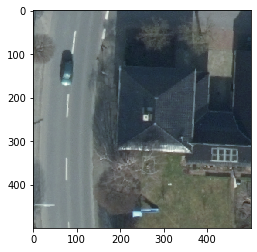

In [65]:
import matplotlib.pyplot as plt

plt.imshow(image)

In [71]:
print(confusion_matrix(target,prediction))

print(classification_report(target,prediction, labels=[0,1]))

[[169  20]
 [ 68 808]]
              precision    recall  f1-score   support

           0       0.71      0.89      0.79       189
           1       0.98      0.92      0.95       876

    accuracy                           0.92      1065
   macro avg       0.84      0.91      0.87      1065
weighted avg       0.93      0.92      0.92      1065

